<span style="font-size: 30px;">EmployeeSalaries_Disparity_Dataset Accompanying Notebook</span>

# 💲 Employee Salaries Disparity Project
---
**Note: This accompanying notebook was created for EDA, validation of calculations used in SQL query, and to generate visualizations used in the Powerpoint Slide** 

# 🎯 Business Objectives
Business Case:
- The data analytics manager of a company would like to seek insights into salary disparities present within the company department
- PWD Department has been flagged as a department that has a high amount of salary spread

Objective:
- Obtain relevant insights with Exploratory Data Analysis (EDA), and create a SQL query that identifies a high amount of variation within the department
- Provide the top 5 department that should be selected for management to review, with regards to having the most variance & discrepancy in salary

Deliverable:
- Provide a list from a SQL database with a way to score variation by Department
JupyterNotebook with accompanying Python code block for SQL calculation cross-validation & EDA

In [1]:
## importing libraries for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pandas as pd
import plotly.graph_objects as go
from scipy import stats

In [2]:
# import csv
df = pd.read_csv('data/Employee_Salaries.csv')

# 🔍 Exploratory Data Analysis on Overall Dataset
---

> **OVERALL GOAL:** 
> - View summary statistics, determine the impact of missing/NaN values on the SQL query, perform data visualization to obtain insights

In [3]:
df.head()

Department                    Department_Division              PCN  \
0        AGR               AGR 001 Directors Office  B.001326.1        
1        AGR               AGR 001 Directors Office         B.003590   
2        AGR               AGR 001 Directors Office         B.004807   
3        AGR  AGR 010 Cooperative Extension Program  B.001801.1        
4        AGR  AGR 010 Cooperative Extension Program  B.002434.1        

                 Position_Title FLSA_Status Initial_Hire_Date Date_in_Title  \
0  Administrative Specialist II  Non Exempt         9/10/1984      3/1/2018   
1   Rural Community Coordinator      Exempt         8/16/2003     12/7/2016   
2       Director of Agriculture      Exempt         10/1/2008     10/1/2008   
3      Administrative Assistant  Non Exempt          2/1/2011     3/14/2019   
4      Administrative Assistant  Non Exempt         8/16/1993     5/16/1999   

      Salary  
0   59947.94  
1   85765.16  
2  137517.91  
3   38745.46  
4   51521.60

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Department           6954 non-null   object 
 1   Department_Division  6954 non-null   object 
 2   PCN                  6954 non-null   object 
 3   Position_Title       6954 non-null   object 
 4   FLSA_Status          6933 non-null   object 
 5   Initial_Hire_Date    6954 non-null   object 
 6   Date_in_Title        6053 non-null   object 
 7   Salary               6946 non-null   float64
dtypes: float64(1), object(7)
memory usage: 434.8+ KB


In [5]:
df.describe().T

count          mean           std  min       25%       50%  \
Salary  6946.0  50311.956067  30931.208983  0.0  35324.12  51198.68   

              75%       max  
Salary  68386.825  271004.5

In [6]:
#### Sanity check on missing values within dataset

# Calculate the count of null values for each column
count_nan = df.isnull().sum()

# Calculate the total number of rows in the dataframe
total_rows = len(df)

# Calculate the percentage of null values for each column
percentage_nan = (count_nan / total_rows) * 100

# Combine the count and percentage values side by side
nan_summary = pd.concat([count_nan, percentage_nan], axis=1, keys=['Count of Null', '% of Null'])

print(nan_summary)

                     Count of Null  % of Null
Department                       0   0.000000
Department_Division              0   0.000000
PCN                              0   0.000000
Position_Title                   0   0.000000
FLSA_Status                     21   0.301984
Initial_Hire_Date                0   0.000000
Date_in_Title                  901  12.956572
Salary                           8   0.115042


Observed that null values are present in 'FLSA_Status', 'Date_in_Title' and 'Salary' column.

'Date_in_Title' is not used in the scope of this project & will be thus ignored

In [7]:
## Check for missing values in 'FLSA_Status'
df[df['FLSA_Status'].isnull()]

Department                        Department_Division              PCN  \
1455        GRD   GRD 010 Voter Registration and Elections         N.030141   
1460        GRD   GRD 010 Voter Registration and Elections         N.030141   
1468        GRD   GRD 010 Voter Registration and Elections         N.030141   
3200        PAR                   PAR 070 CRC - Kempsville         N.090153   
3419        PAR                   PAR 073 CRC - Great Neck         N.090161   
3512        PAR                PAR 075 CRC - Princess Anne         N.090163   
3540        PAR                PAR 075 CRC - Princess Anne         N.090163   
3804        PAR    PAR 085 Therapeutic Recreation Programs         N.030440   
3959        PAR  PAR 089 Out-Of-School Time - School Based         N.030093   
3961        PAR  PAR 089 Out-Of-School Time - School Based         N.030093   
3999        PAR  PAR 089 Out-Of-School Time - School Based         N.030094   
6402        SHF             SHF 033 Court Support Services         S.020001   
6408        SHF             SHF 033 Court Support Services         S.020001   
6421        SHF             SHF 033 Court Support Services         S.020001   
6442        SHF             SHF 033 Court Support Services         S.020001   
6452        SHF             SHF 033 Court Support Services         S.020001   
6469        SHF             SHF 033 Court Support Services         S.020001   
6474        SHF             SHF 033 Court Support Services         S.020001   
6477        SHF             SHF 033 Court Support Services         S.020001   
6490        SHF             SHF 033 Court Support Services         S.020001   
6542        SHF            SHF 034 Correctional Operations  S.020066.2        

                          Position_Title FLSA_Status Initial_Hire_Date  \
1455               Board of Equalization         NaN          1/1/2021   
1460               Board of Equalization         NaN         5/14/2018   
1468               Board of Equalization         NaN         5/15/2018   
3200                           Lifeguard         NaN          1/9/2020   
3419                 Aquatics Instructor         NaN          2/5/2020   
3512                 Aquatics Instructor         NaN         1/17/2020   
3540                 Aquatics Instructor         NaN         3/10/2020   
3804    Activity Center Assistant Leader         NaN         1/27/2020   
3959    Activity Center Assistant Leader         NaN          7/9/2020   
3961    Activity Center Assistant Leader         NaN          7/9/2020   
3999              Activity Center Leader         NaN          7/9/2020   
6402           Security Screener (State)         NaN         7/26/2021   
6408           Security Screener (State)         NaN         8/19/2021   
6421           Security Screener (State)         NaN          9/2/2021   
6442           Security Screener (State)         NaN          7/1/2001   
6452           Security Screener (State)         NaN         9/30/1976   
6469           Security Screener (State)         NaN          2/1/2000   
6474           Security Screener (State)         NaN         8/26/2021   
6477           Security Screener (State)         NaN        11/16/2012   
6490           Security Screener (State)         NaN          2/1/1997   
6542  Public Safety Investigator (State)         NaN         7/15/2021   

     Date_in_Title  Salary  
1455           NaN     NaN  
1460           NaN     NaN  
1468           NaN     NaN  
3200           NaN   12.06  
3419           NaN   15.72  
3512           NaN   15.72  
3540           NaN   15.72  
3804           NaN   12.80  
3959           NaN   12.80  
3961           NaN   12.80  
3999           NaN   14.89  
6402     7/26/2021   14.13  
6408     8/19/2021   14.13  
6421      9/2/2021   14.13  
6442      6/3/2021   22.78  
6452           NaN   22.78  
6469      6/3/2021   22.78  
6474     8/26/2021   14.13  
6477     8/19/2021   14.13  
6490     6/17/2021   22.78  
6542     7/15/2021   24.02

Salary where FLSA_Status is null mostly falls into the Lower Income Bracket range, as such it will not affect final calculation, where analysis is centered around Upper Income Bracket. Salary of PCN 'N.030141' could be looked into to obtain a more accurate analysis

In [8]:
df[df['Date_in_Title'].isnull()] ## 'Date_in_Title' not used in the scope of this project, we see that corresponding salary values are still intact

Department                             Department_Division  \
5           AGR                          AGR 110 Farmers Market   
8           AGR                          AGR 110 Farmers Market   
116         CIR             CIR 011 Circuit Court/Judges Office   
119         CIR             CIR 011 Circuit Court/Judges Office   
135         CIT  CIT 120 Information Technology Business Center   
...         ...                                             ...   
6605        SHF                 SHF 034 Correctional Operations   
6712        SHF                 SHF 034 Correctional Operations   
6757        SHF                 SHF 034 Correctional Operations   
6838        SHF                          SHF 039 Inmate Support   
6935        TRE                          TRE 020 City Treasurer   

                  PCN            Position_Title FLSA_Status Initial_Hire_Date  \
5            N.030520        Office Assistant I  Non Exempt         7/16/2021   
8            N.030636   Operations Assistant II  Non Exempt          6/7/2018   
116          N.090175        Judicial Assistant  Non Exempt          7/1/2021   
119          B.005758                 Law Clerk      Exempt         8/12/2021   
135   B.004374.3             Systems Analyst II      Exempt         8/26/2021   
...               ...                       ...         ...               ...   
6605         S.020641  Deputy Sheriff I (State)  Non Exempt         12/1/2008   
6712         S.020002             Clerk (State)  Non Exempt         1/17/2019   
6757         S.020002             Clerk (State)  Non Exempt         8/16/2018   
6838  S.020052.2                  Clerk (State)  Non Exempt         6/17/2021   
6935  B.002168.1          Treasury Specialist I  Non Exempt         7/29/2021   

     Date_in_Title    Salary  
5              NaN     14.14  
8              NaN     13.57  
116            NaN     17.67  
119            NaN  52208.00  
135            NaN  81120.00  
...            ...       ...  
6605           NaN     28.15  
6712           NaN     10.98  
6757           NaN     10.98  
6838           NaN     10.66  
6935           NaN  31844.80  

[901 rows x 8 columns]

In [31]:
## Sanity check for missing salary information
df[df['Salary'].isnull()]

Department                       Department_Division       PCN  \
1455        GRD  GRD 010 Voter Registration and Elections  N.030141   
1458        GRD  GRD 010 Voter Registration and Elections  N.030141   
1460        GRD  GRD 010 Voter Registration and Elections  N.030141   
1466        GRD  GRD 010 Voter Registration and Elections  N.030141   
1468        GRD  GRD 010 Voter Registration and Elections  N.030141   
6321        REA             REA 011 Board of Equalization  N.030010   
6322        REA             REA 011 Board of Equalization  N.030010   
6323        REA             REA 011 Board of Equalization  N.030010   

             Position_Title FLSA_Status Initial_Hire_Date Date_in_Title  \
1455  Board of Equalization         NaN          1/1/2021           NaN   
1458  Board of Equalization      Exempt          3/1/2014      3/1/2014   
1460  Board of Equalization         NaN         5/14/2018           NaN   
1466  Board of Equalization      Exempt          1/1/2007           NaN   
1468  Board of Equalization         NaN         5/15/2018           NaN   
6321  Board of Equalization      Exempt          8/1/2015           NaN   
6322  Board of Equalization      Exempt          7/1/2016           NaN   
6323  Board of Equalization      Exempt          7/1/2012           NaN   

      Salary  
1455     NaN  
1458     NaN  
1460     NaN  
1466     NaN  
1468     NaN  
6321     NaN  
6322     NaN  
6323     NaN

Possibility to check with data engineering team/ data analytics manager to request for salary data for employee with PCN N.030010 & N.030141 from REA 011 Board of Equalization and GRD 010 Voter Registration and Elections respectively for more conclusive analysis.

- Missing 'Salary' values constitute of 0.12% of total rows in dataframe [quite minimal]
- We'll proceed with data analysis without any missing salary value imputation

<span style="font-size: 25px;">Histogram & Quantile-Quantile Plot of Salary across all Income Bracket</span>

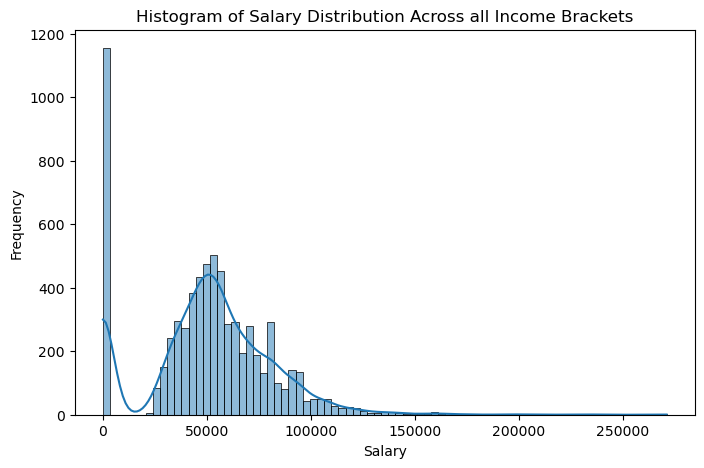

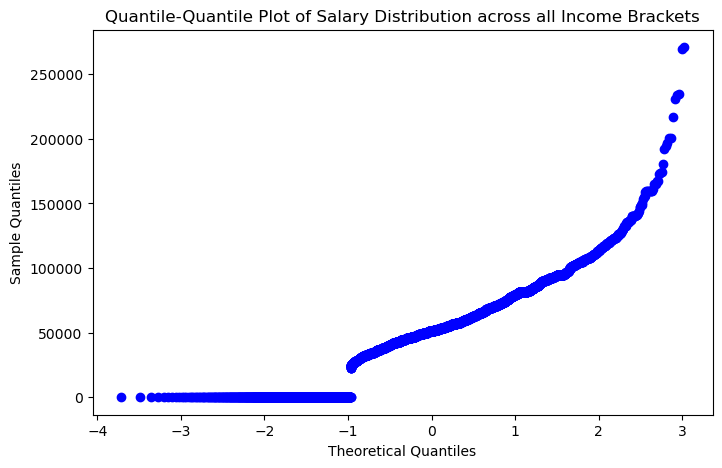

In [10]:
## Slicing original df to obtain only the Salary column
salary_column_distribution = df['Salary']

# # Shapiro-Wilk test for normality
# shapiro_test_statistic, shapiro_p_value = stats.shapiro(salary_column_distribution)
# print(f"Shapiro-Wilk test statistic: {shapiro_test_statistic}, p-value: {shapiro_p_value}")

# Visualization: Histogram
plt.figure(figsize=(8, 5))
sns.histplot(salary_column_distribution, kde=True, 
#              bins = 60
            bins='auto'
            )
plt.title("Histogram of Salary Distribution Across all Income Brackets")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# Visualization: Q-Q plot
plt.figure(figsize=(8, 5))
stats.probplot(salary_column_distribution, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot of Salary Distribution across all Income Brackets")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

From this plot, we notice that the highest count of employees within the company fall into the Lower Income bracket of <= $10,000

EDA on the lower income bracket is performed to determine if the Lower income bracket should be considered for departmental salary disparity analysis
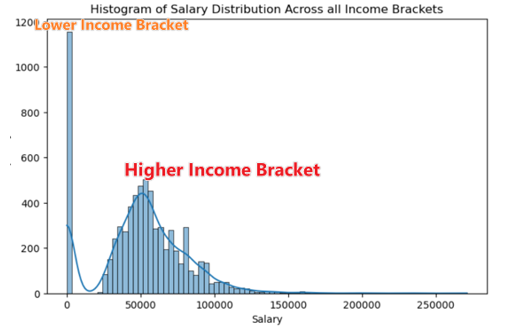

# 🔍 Exploratory Data Analysis on Lower Income Bracket [<=$10,000]
---

> **OVERALL GOAL:** 
> - View summary statistics, identify characteristics of Lower Income Bracket & to perform data visualization to justify that salary disparity analysis should mainly be conducted for employees within the higher income bracket [Later renamed as: Annual Salaried Employees]

First we perform a slice to obtain a df containing only the data in the defined lower income bracket

In [11]:
## defining lower income bracket
df_lower_salary_bracket = df[df['Salary'] <= 10000]

# Reindex after the slice
df_lower_salary_bracket = df_lower_salary_bracket.reset_index(drop=True)
df_lower_salary_bracket

Department                  Department_Division              PCN  \
0           AGR               AGR 110 Farmers Market         N.030520   
1           AGR               AGR 110 Farmers Market         N.030636   
2           CIR  CIR 011 Circuit Court/Judges Office         N.090175   
3           COR                   COR 002 DMV Select  N.030663.1        
4           COR                   COR 002 DMV Select  P.050239.1        
...         ...                                  ...              ...   
1150        SHF      SHF 034 Correctional Operations         S.020002   
1151        SHF           SHF 035 Sheriffs Care Mart  P.050112.1        
1152        SHF           SHF 035 Sheriffs Care Mart  S.020063.2        
1153        SHF               SHF 039 Inmate Support  S.020052.2        
1154        SHF               SHF 039 Inmate Support  N.030652.1        

                Position_Title FLSA_Status Initial_Hire_Date Date_in_Title  \
0           Office Assistant I  Non Exempt         7/16/2021           NaN   
1      Operations Assistant II  Non Exempt          6/7/2018           NaN   
2           Judicial Assistant  Non Exempt          7/1/2021           NaN   
3            Revenue Agent III  Non Exempt         1/14/1980           NaN   
4             Account Clerk II  Non Exempt        12/22/2014    10/24/2019   
...                        ...         ...               ...           ...   
1150             Clerk (State)  Non Exempt         8/16/2018           NaN   
1151   Storekeeper III (State)  Non Exempt          4/1/1985    12/16/2011   
1152  Inmate Services Director  Non Exempt         7/17/1985      2/1/2011   
1153             Clerk (State)  Non Exempt         6/17/2021           NaN   
1154             Clerk (State)  Non Exempt         10/6/2015     10/6/2015   

      Salary  
0      14.14  
1      13.57  
2      17.67  
3      21.08  
4      15.61  
...      ...  
1150   10.98  
1151   23.13  
1152   51.99  
1153   10.66  
1154   11.17  

[1155 rows x 8 columns]

In [12]:
print(f"Get all unique FLSA_Status: {df_lower_salary_bracket['FLSA_Status'].unique()}") ## contains all types of staff, I was interested in seeing if workers in this salary range are Non-exempt employees
print("===" * 30)
print(df_lower_salary_bracket.info())
print("===" * 30)
print(df_lower_salary_bracket.describe().T) ## summary statistics for lower income bracket

Get all unique FLSA_Status: ['Non Exempt' 'Exempt' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Department           1155 non-null   object 
 1   Department_Division  1155 non-null   object 
 2   PCN                  1155 non-null   object 
 3   Position_Title       1155 non-null   object 
 4   FLSA_Status          1137 non-null   object 
 5   Initial_Hire_Date    1155 non-null   object 
 6   Date_in_Title        346 non-null    object 
 7   Salary               1155 non-null   float64
dtypes: float64(1), object(7)
memory usage: 72.3+ KB
None
         count      mean       std  min   25%    50%    75%    max
Salary  1155.0  14.25742  4.384736  0.0  11.5  13.33  15.72  51.99


Here we observe that in the lower income bracket, the mean salary is <$100. I suspect that most of the employees in the lower income bracket have their salary listed as hourly wage rather than annual wage. I want to re-examine the characteristics & distribution of employees in this income group with data visualizations.

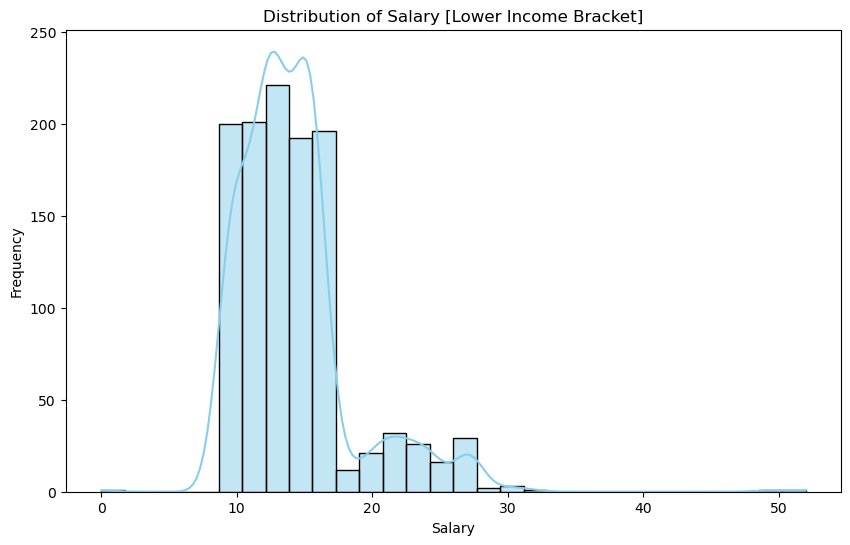

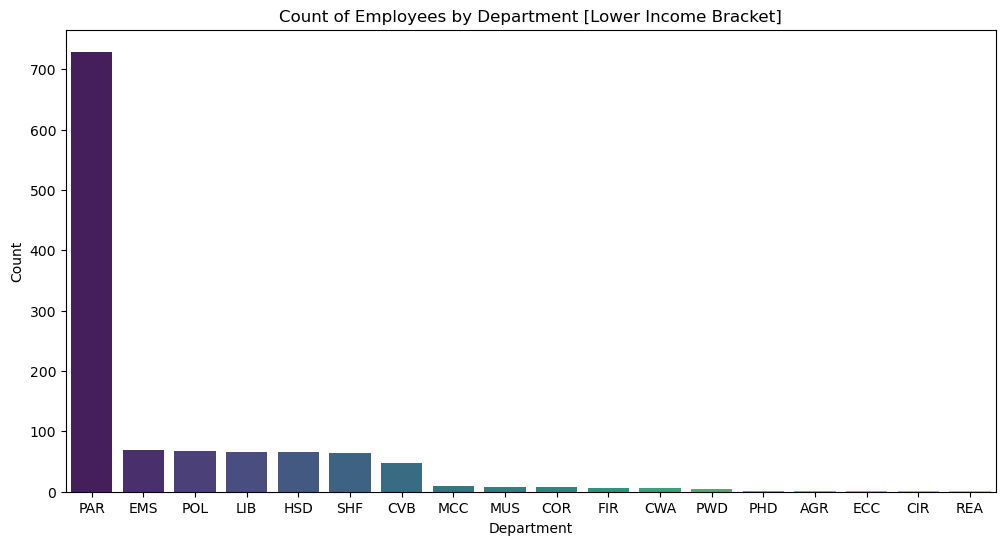

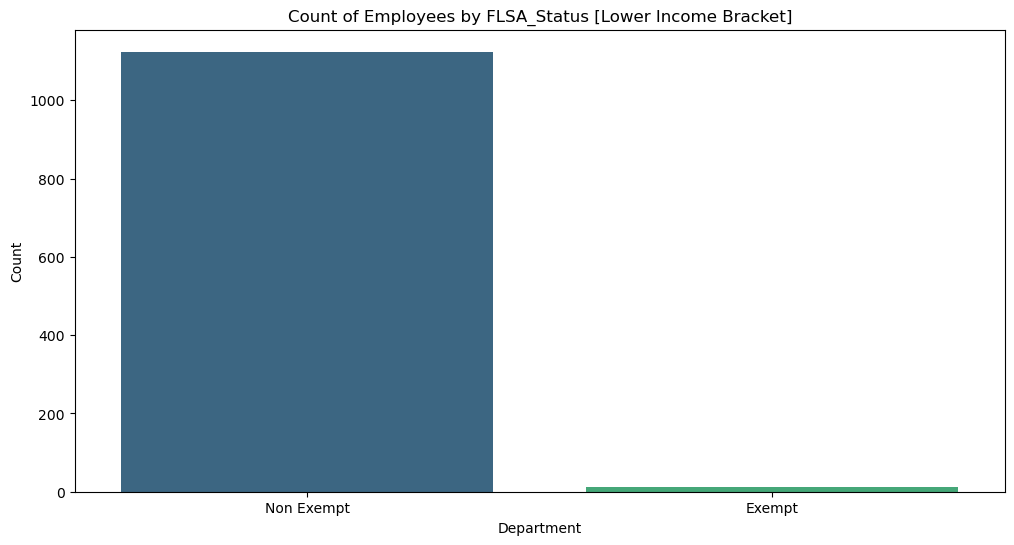

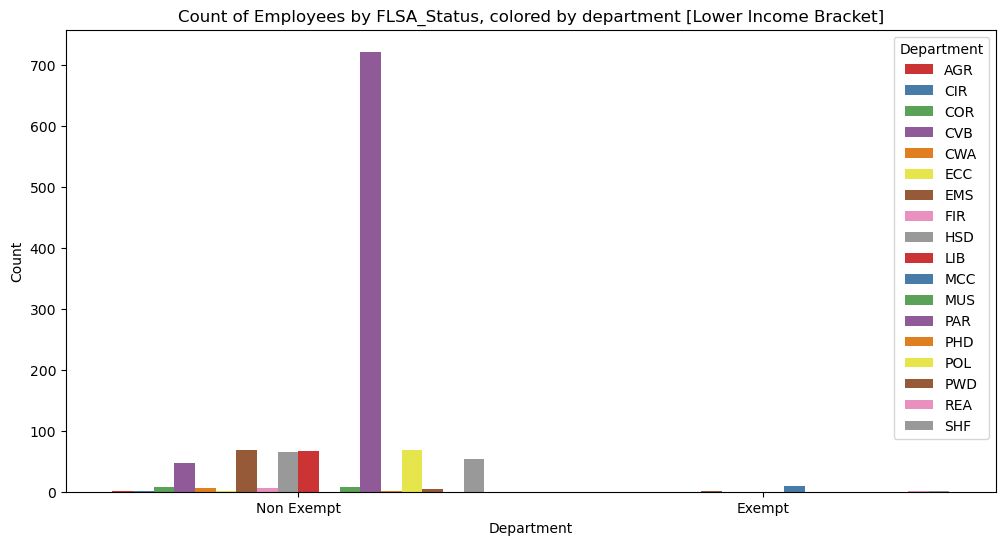

In [13]:
## defining lower income bracket
df_lower_salary_bracket = df[df['Salary'] <= 10000]

# Visualize the distribution of 'Salary' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_lower_salary_bracket['Salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salary [Lower Income Bracket]')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'Department' using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', data=df_lower_salary_bracket, palette='viridis', order=df_lower_salary_bracket['Department'].value_counts().index)
plt.title('Count of Employees by Department [Lower Income Bracket]')
plt.xlabel('Department')
plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
plt.show()

# Define a color palette with enough distinct colors for each department
plt.figure(figsize=(12, 6))
sns.countplot(x='FLSA_Status', data=df_lower_salary_bracket, 
              palette='viridis', 
              order=df_lower_salary_bracket['FLSA_Status'].value_counts().index)
plt.title('Count of Employees by FLSA_Status [Lower Income Bracket]')
plt.xlabel('Department')
plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
plt.show()

#### Histogram plot of FLSA_Status' ####
# Define a color palette with enough distinct colors for each department
department_colors = sns.color_palette('Set1', n_colors=len(df_lower_salary_bracket['Department'].unique()))

plt.figure(figsize=(12, 6))
sns.countplot(x='FLSA_Status', hue = 'Department', data=df_lower_salary_bracket, 
              palette=department_colors, 
#               palette='viridis', 
              order=df_lower_salary_bracket['FLSA_Status'].value_counts().index)
plt.title('Count of Employees by FLSA_Status, colored by department [Lower Income Bracket]')
plt.xlabel('Department')
plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
plt.show()

#### Treemap plot, non-continuous color ####
df_lower_salary_bracket = df[df['Salary'] <= 10000]

# Grouping the data by 'Department', 'FLSA_Status', and 'Position_Title' and counting occurrences
grouped_data = df_lower_salary_bracket.groupby(['Department', 'FLSA_Status', 'Position_Title']).size().reset_index(name='count')

fig = px.treemap(grouped_data, 
                 path=[px.Constant("Lower Income Bracket Treemap"), 'FLSA_Status', 'Department', 'Position_Title'], 
                 values='count',  # Use the 'count' column as the values for treemap
                 color_continuous_scale='RdBu',  # Set the color scale to 'RdBu' based on 'count' values
                 hover_data={'count': True},  # Show the 'count' column on hover
                 labels={'count': 'Count'})  # Label for the hover_data

fig.update_layout(title='Treemap of Lower Income Bracket', margin=dict(t=50, l=25, r=25, b=25))
fig.show()

#### Treemap plot, continuous color, to use in Powerpoint slide, shows Position_Title within Non-Exempt Staff clearer ####
# Grouping the data by 'Department', 'FLSA_Status', and 'Position_Title' and counting occurrences

grouped_data = df_lower_salary_bracket.groupby(['Department', 'FLSA_Status', 'Position_Title']).size().reset_index(name='count')

fig = px.treemap(grouped_data, 
                 path=[px.Constant("Lower Salary Bracket Treemap"), 'FLSA_Status', 'Department', 'Position_Title'], 
                 values='count',  # Set the 'count' column as the values for the size of tiles
                 color='count',  # Use the 'count' column to set the color based on the count values
                 color_continuous_scale='RdBu',  # Set the color scale to 'RdBu' based on 'count' values
                 hover_data={'count': True},  # Show the 'count' column on hover
                 labels={'count': 'Count'})  # Label for the hover_data

fig.update_layout(title='Treemap of Lower Income Bracket under FLSA_Status', width=1000, height=600, margin=dict(t=50, l=25, r=25, b=25))
fig.show()

From the Plots above, we observe in the lower income bracket that:

A significant number of employees whose salaries fall in the lower income bracket of <= $10,000 are mainly made up of non-exempt staff (1124 employees) as compared to exempt staff (13 employees), and are mostly from the ‘PAR’ Department

According to the Fair Labor Standards Act (FLSA):
Exempt staff are not eligible for overtime pay and are paid a fixed salary, often performing managerial or professional duties which have typically higher barrier of skill entry

Non-exempt staff are defined as defined as staff members who are eligible for overtime pay for hours worked beyond 40 per week, and they usually receive hourly wages.

As inferred from the Tree-map, we also observed that the majority of non-exempt staff hold positions that have a lower barrier of skill entry (such as a Clerk Cashier).

In [14]:
# #### Treemap plot, continuous color, to use in Powerpoint slide, was later removed ####
# # Grouping the data by 'Department', 'FLSA_Status', and 'Position_Title' and counting occurrences
# grouped_data = df_lower_salary_bracket.groupby(['Department', 'FLSA_Status', 'Position_Title']).size().reset_index(name='count')

# fig = px.treemap(grouped_data, 
#                  path=[px.Constant("Lower Salary Bracket Treemap"), 'FLSA_Status', 'Department', 'Position_Title'], 
#                  color='count',  # Use the 'count' column to set the color based on the count values
#                  color_continuous_scale='RdBu',  # Set the color scale to 'RdBu' based on 'count' values
#                  hover_data={'count': True},  # Show the 'count' column on hover
#                  labels={'count': 'Count'})  # Label for the hover_data

# fig.update_layout(title='Treemap of Lower Salary Bracket under FLSA_Status', width=1000, height=600, margin=dict(t=50, l=25, r=25, b=25))
# fig.show()

# ❗ Concluding that the previously incorrectly labelled 'Lower Income Bracket' employees actually consists of hourly salaried employees ❗

Taking 'Clerk Cashier' as an example of a non-exempt staff with a lower barrier of skill entry, I wanted to observe the salary distribution with the .csv extracted from the SQL code below:

The SQL code written retrieves all columns for employees with the position title 'Clerk Cashier' from the 'Employee_Salaries' table & orders the results based on the 'Salary' column in descending order:

SELECT *

FROM EmployeeSalaries_Disparity_Dataset.dbo.Employee_Salaries$

WHERE Position_Title = 'Clerk Cashier'

ORDER BY Salary DESC

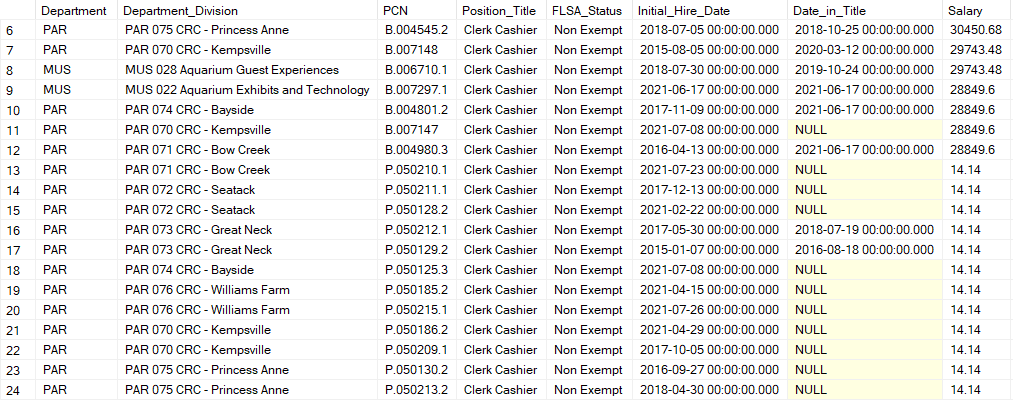

We import the .csv file outputted from the above SQL query for analysis

In [15]:
Clerk_Cashier_Annual_Hourly_df = pd.read_csv('data/Clerk_Cashier_Annual_Hourly.csv')

Range of the dataset: 38943.74


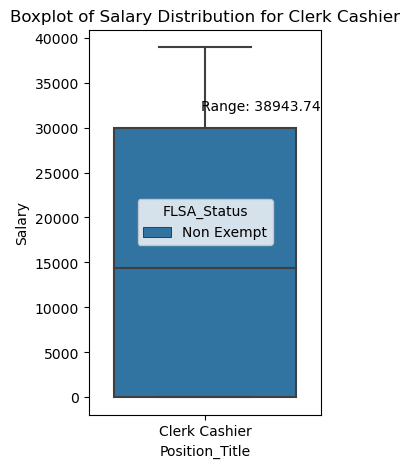

In [16]:
## Boxplot to share salary distribution of Clerk Cashier
#### Range Calculation ####
Clerk_Cashier_Annual_Hourly_df['Salary']
data_range = max(Clerk_Cashier_Annual_Hourly_df['Salary']) - min(Clerk_Cashier_Annual_Hourly_df['Salary'])
print("Range of the dataset:", data_range)

plt.figure(figsize=(3, 5))
sns.boxplot(x='Position_Title', y='Salary', data=Clerk_Cashier_Annual_Hourly_df, hue="FLSA_Status")
plt.title("Boxplot of Salary Distribution for Clerk Cashier")
plt.xlabel("Position_Title")
plt.ylabel("Salary")
plt.annotate(f"Range: {data_range}", xy=(0.74, 0.8), xycoords='axes fraction', ha='center', va='center', fontsize=10)
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

As observed from the box plot above, taking 'Clerk Cashier' as an example of a non-exempt staff with a lower barrier of skill entry:
- We observe the salary for the position title of 'Clerk Cashier' varies widely in the dataset provided according to the box plot plotted, this is further supported by the calculated range value
- Hence, we conclude that clerk cashiers with a lower salary value of ~14.14 are most likely to be hourly salaried workers and clerk cashiers with a higher salary value of >$10,000 are most likely paid annual wages

It appears that our dataset contains salary information of BOTH hourly and annual waged workers, which are characterised by the 2 distinct peaks in the initial 'Histogram of Salary Distribution Across all Income Brackets' plot.
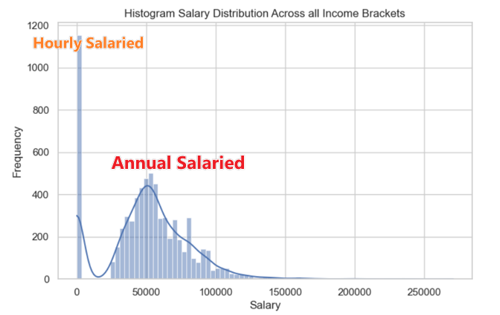

Owing to the fact that it's difficult to accurately predict the actual take-home amount of hourly salaried workers as the # of hours that they've worked is not listed in the dataset, I'd like to limit the departmental salary disparity analysis to annual salaried workers only, which corresponds to Salary >$10,000.

From this point on, I'll also refer to 'Lower Income Bracket' workers as 'hourly salaried workers' and 'Higher Income Bracket' workers as 'annual salaried workers'.

The SQL query was written below to categorize the workers accordingly as well:
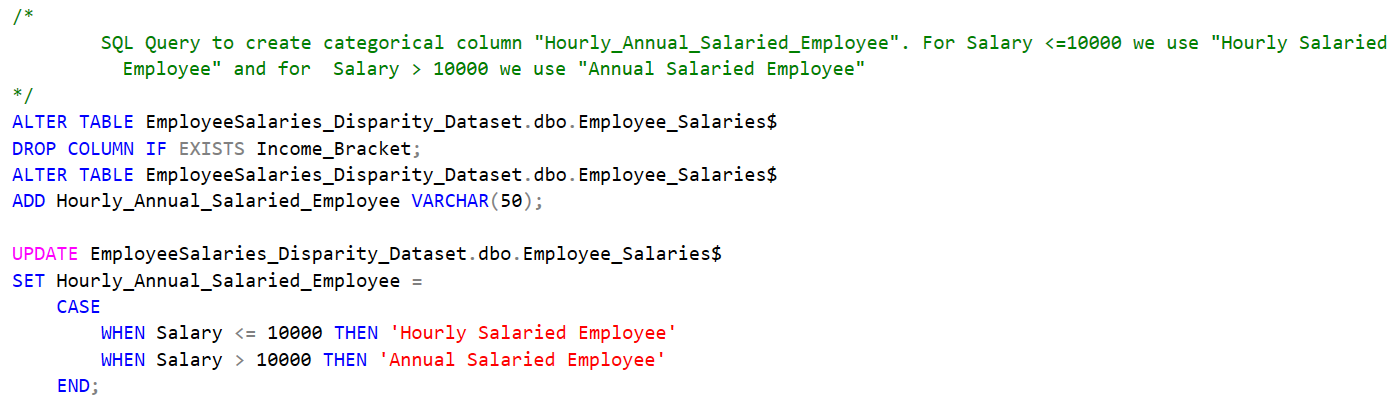

<b>Hence, in this study, I will only focus on the investigation of salary disparity amongst departments that contain annual salaried employees.<b>

In [17]:
#### Testing for Z-Score Threshold on outlier count, Ignore Code Block ####
# # Filter out rows where 'Salary' is <= 10000
# df_salary_filtered = df[df['Salary'] > 10000]

# # Calculate Z-scores for 'Salary' column
# z_scores = np.abs(stats.zscore(df_salary_filtered['Salary']))
# print(z_scores)

# # Set a range of potential threshold values, to observe the effects on Z-Score Threshold on outlier_count
# THRESHOLDS = np.arange(1.9, 5.2, 0.1) ## create array of values saved to thresholds from 1.9 to 5, having a step size of 0.1 to iterate through

# # Initialize an empty dictionary to store the number of outliers for each threshold
# outliers_count = {}

# # Loop through the thresholds and count the number of outliers for each
# for threshold in THRESHOLDS:
#     num_outliers = len(z_scores[z_scores > threshold])
#     outliers_count[threshold] = num_outliers
    
# # Determine the optimal z-score threshold to obtain the minimum and maximum # of outliers
# optimal_threshold_min_outliercount = min(outliers_count, key=outliers_count.get)
# optimal_threshold_max_outliercount = max(outliers_count, key=outliers_count.get)

# print("Z-Score Threshold, to obtain min outlier count:", optimal_threshold_min_outliercount)
# print("Z-Score Threshold, to obtain max outlier count:", optimal_threshold_max_outliercount)

# 🔍 Exploratory Data Analysis on Annual Salaried Employees (Previously incorrectly assumed as Higher Income Bracket Workers)
---

> **OVERALL GOAL:** 
> - View summary statistics, identify characteristics of Annual Salaried Employees & to perform data visualization to recommend the top 5 departments that have salary disparities to look into

<span style="font-size: 15px;">Double checking SQL calculations Mean, Std, CV Calculations from SQL query [Validated Calculations]</span>

In [18]:
# Calculate the mean
df_salary_filtered = df[df['Salary']>10000]

# Group the data by 'Department' and calculate the mean and standard deviation for 'Salary'
department_stats_salary_filtered = df_salary_filtered.groupby('Department').agg({'Salary': ['mean', 'std']})

# Calculate the Coefficient of Variation (COV)
department_stats_salary_filtered['Coefficient of Variation'] = department_stats_salary_filtered['Salary']['std'] / department_stats_salary_filtered['Salary']['mean'] * 100

# Rename the columns to 'Mean' and 'Standard Deviation'
department_stats_salary_filtered.columns = ['Mean', 'Standard Deviation', 'Coefficient of Variation']

# Round the calculated statistics to two decimal places
department_stats_salary_filtered = department_stats_salary_filtered.round(2)

department_stats_salary_filtered.sort_values(by=['Coefficient of Variation'], ascending=False, inplace=False)

department_stats_salary_filtered
print(department_stats_salary_filtered)
# department_stats_salary_filtered.to_csv('comparison.csv', index=True) ## Validated Calulation in SQL query is correct, commented out code block to not save .csv file

                 Mean  Standard Deviation  Coefficient of Variation
Department                                                         
AGR          63457.62            34426.74                     54.25
AUD          88504.13            35562.14                     40.18
CAD          93902.41            45415.42                     48.36
CCC          47720.64            25641.94                     53.73
CIR          64061.38            27153.87                     42.39
CIT          85091.31            23292.89                     27.37
CLK          59403.76            25562.12                     43.03
CMD         107711.81            68918.53                     63.98
COM          68566.75            24824.62                     36.21
COR          56679.49            24278.21                     42.83
CUL          63193.65            30134.15                     47.69
CVB          56411.43            20951.06                     37.14
CWA          77204.04            36869.17       

<span style="font-size: 25px;">EDA, identifying characteristics of Annual Salaried Workers</span>

<span style="font-size: 15px;">Calculation of Mean & Median of Annual Salaried Employees to determine Skewness</span>

In [19]:
# Filter out rows where 'Salary' is < 10000
df_salary_filtered = df[df['Salary'] > 10000]

## Slicing original df to obtain only the Salary column
salary_column_distribution = df_salary_filtered['Salary']
salary_column_distribution

# Calculate the mean and median
mean_salary = round(salary_column_distribution.mean(),3)
median_salary = round(salary_column_distribution.median(),3)

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)

Mean Salary: 60343.702
Median Salary: 55224.0


<span style="font-size: 15px;">Histogram & Q-Q Plot of Annual Salaried Employees</span>

Sample Size: 5791
Skewness: 1.6573443231516338
Kurtosis: 6.3187607388365485


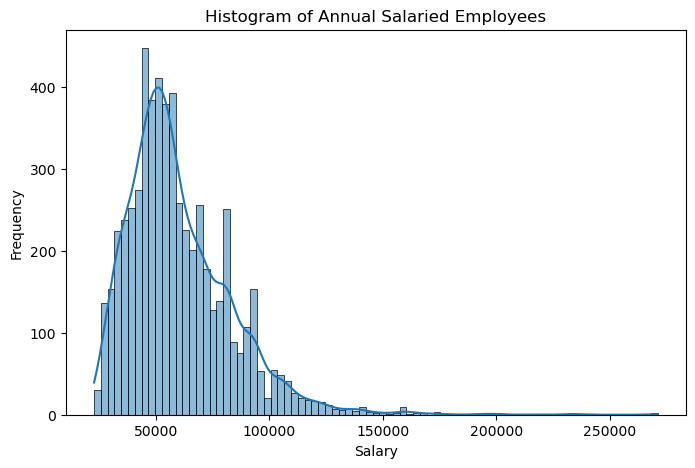

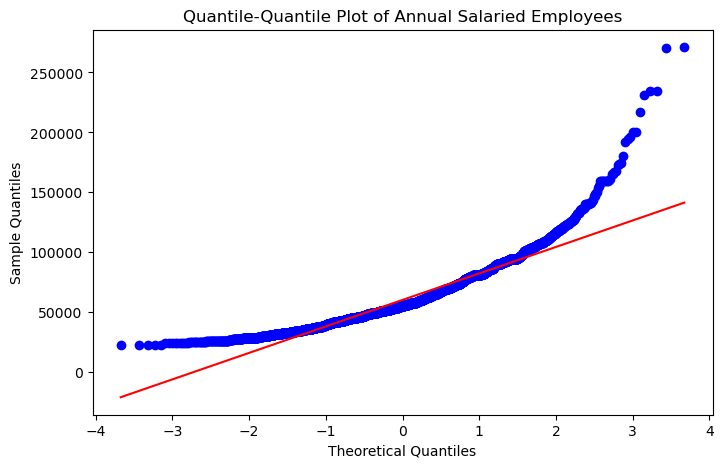

In [20]:
# Filter out rows where 'Salary' is < 10000
df_salary_filtered = df[df['Salary'] > 10000]

## Slicing original df to obtain only the Salary column
salary_column_distribution = df_salary_filtered['Salary']

# Calculate sample size
sample_size = df_salary_filtered['Salary'].shape[0]

# Calculate skewness
skewness = df_salary_filtered['Salary'].skew()

# Calculate kurtosis
kurtosis = df_salary_filtered['Salary'].kurtosis()

# # Shapiro-Wilk test for normality, ignore
# shapiro_statistic, shapiro_p_value = stats.shapiro(df_salary_filtered['Salary'])

print("Sample Size:", sample_size)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)
# print("Shapiro-Wilk Test Statistic:", shapiro_statistic)
# print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Shapiro-Wilk test for normality
# shapiro_test_statistic, shapiro_p_value = stats.shapiro(salary_column_distribution)
# print(f"Shapiro-Wilk test statistic: {shapiro_test_statistic}, p-value: {shapiro_p_value}")

# Visualization: Histogram
plt.figure(figsize=(8, 5))
sns.histplot(salary_column_distribution, kde=True,
#              hue = 'Departments',
             bins='auto',
#              bins=80
            )
plt.title("Histogram of Annual Salaried Employees")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# Visualization: Q-Q plot
plt.figure(figsize=(8, 5))
stats.probplot(salary_column_distribution, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot of Annual Salaried Employees")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

### Old Comments ###
# print("The above Histogram & Quantile-Quantile [Q-Q] plots serves to illustrate the distribution of the data.")
# print("\nExplanation of the tests:")
# print("\nShapiro-Wilk Test:")
# print("\nThe Shapiro-Wilk Test returns a test statistic and a p-value. If the p-value is greater than 0.05 (commonly chosen significance level), it suggests that the data follows a normal distribution.")
# print("\nQuantile-Quantile Plot [Q-Q plot]:")
# print("\nIn the Quantile-Quantile [Q-Q] plot, if the points closely follow the diagonal line, it indicates that the data is close to normal. If the points deviate substantially, it suggests non-normality.")

# print("\nBecause the Z-Test assumes normal distribution of a dataset, and as we can see from both the Q-Q plot & histogram plot, that salary does not follow a normal distribution across the entire dataset. I've decided to opt for ")

# print("\nDue to the following reasons below, I'll be opting for outlier detection via IQR/boxplot method instead for salary disparity within departments:")
# print("\n 1)  Z-Test assumes normal distribution of a dataset, and as we can see from both the Q-Q plot & histogram plot, that salary does not follow a normal distribution across the entire dataset. Most salary histograms. Most salary plots, including the one obtained from this dataset, is usually right-skewed. This is because most people earn in the low/medium range of salaries, with a few exceptions.")
# print("\n 2) Further investigation revealed that 1155 rows have a salary of <$1000, which is the reason for the left peak in the Histogram plot. This is a large reason for the dataset to not follow a normal distribution [?]")
# print("\n 3) p-values may not be accurate for N > 5000. Our dataset contains 6946 rows in salary")

The above Histogram & Quantile-Quantile [Q-Q] plots serves to illustrate the distribution of the data.

Explanation of the tests:

<!-- - Shapiro-Wilk Test:
>The Shapiro-Wilk Test returns a test statistic and a p-value. If the p-value is greater than 0.05 (commonly chosen significance level), it suggests that the data follows a normal distribution. -->

- Quantile-Quantile Plot [Q-Q plot]:

>In the Quantile-Quantile [Q-Q] plot, if the points closely follow the diagonal line, it indicates that the data is close to normal. If the points deviate substantially, it suggests non-normality.

Z-Test typically assumes normal distribution of a dataset, and as we can see from both the Q-Q plot & histogram plot, that salary does not follow a normal distribution for annual salaried workers.

Z-Score values are typically more significant when a dataset is normally distributed.
Taking into consideration that the end goal is to identify departments with salary disparity, I’ve decided to place more emphasis on the calculated CV value as opposed to Outlier Counts obtained from Z-Score values on a non-normal dataset

<!-- Outlier detection via IQR/boxplot method for salary disparity within departments is also an alternate method to look  into as well -->

<span style="font-size: 25px;">Histogram & Quantile-Quantile Plot of a Normally Distributed Plot for comparison</span>

I’ve included both a histogram and a Q-Q plot for a typical normally distributed dataset for reference purposes

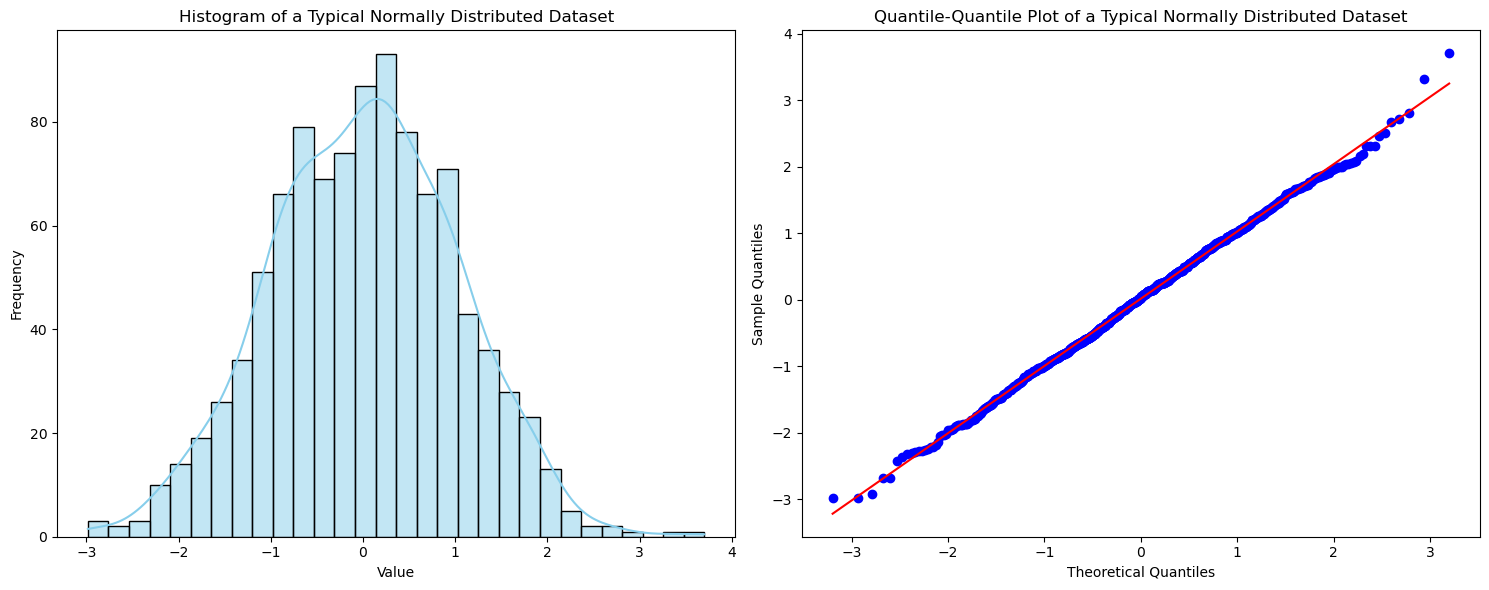

In [21]:
# Generation of an example of a normally distributed dataset
np.random.seed(3)
mean = 0
std_dev = 1
sample_size = 1000
dummy_data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(dummy_data)
alpha = 0.05

# Create side-by-side subplots for histogram and Q-Q plot
plt.figure(figsize=(15, 6))

# Plot the histogram (normalized)
plt.subplot(1, 2, 1)
plt.title("Histogram of a Typical Normally Distributed Dataset")
sns.histplot(dummy_data, kde=True, color='skyblue', bins=30)
plt.xlabel("Value")
plt.ylabel("Frequency")

# Visualization: Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(dummy_data, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot of a Typical Normally Distributed Dataset")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display Shapiro-Wilk test result as main title
# if p_value > alpha:
#     plt.suptitle(f"Shapiro-Wilk Test: p-value = {p_value:.4f}\nData appears to be normally distributed", y=1.02)
# else:
#     plt.suptitle(f"Shapiro-Wilk Test: p-value = {p_value:.4f}\nData does not appear to be normally distributed", y=1.02)

plt.tight_layout()
plt.show()

<span style="font-size: 15px;">Histogram of all departments for Annual Salaried Employees was plotted to determine if all departments for annual salaried employees are right-skewed</span>

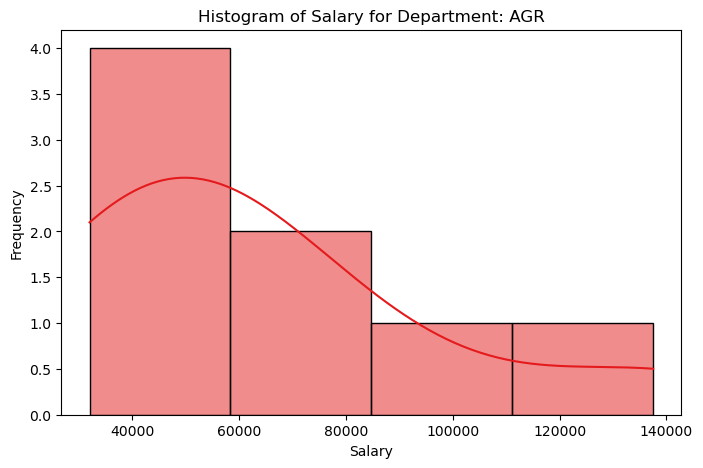

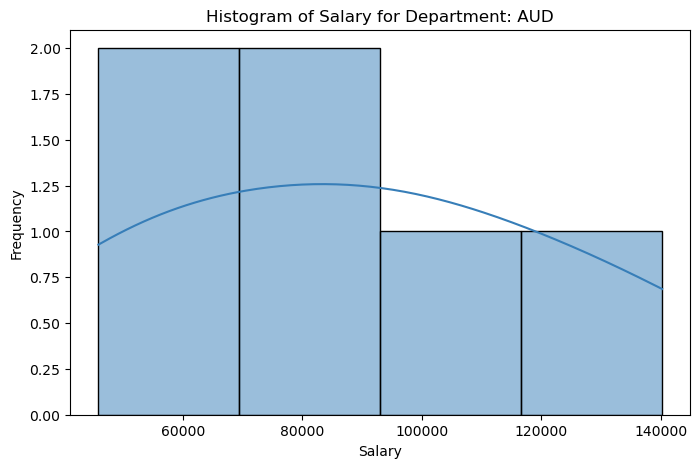

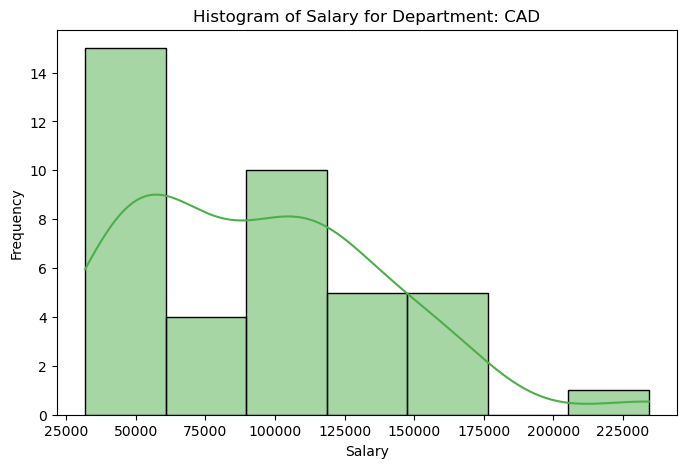

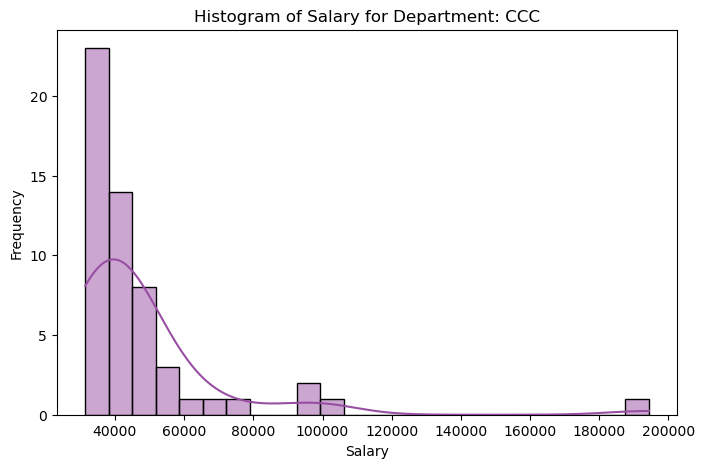

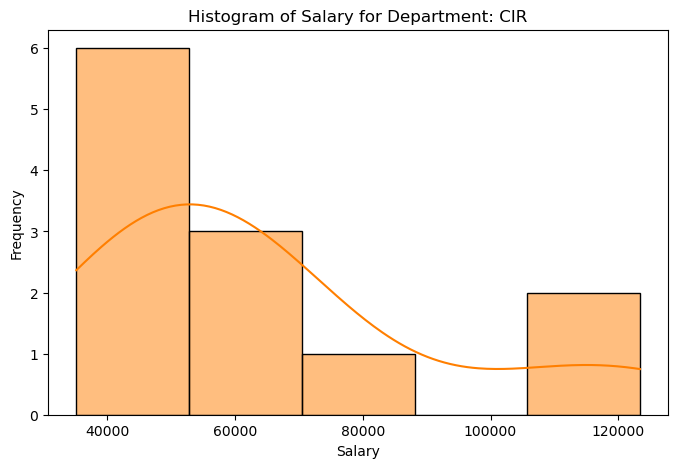

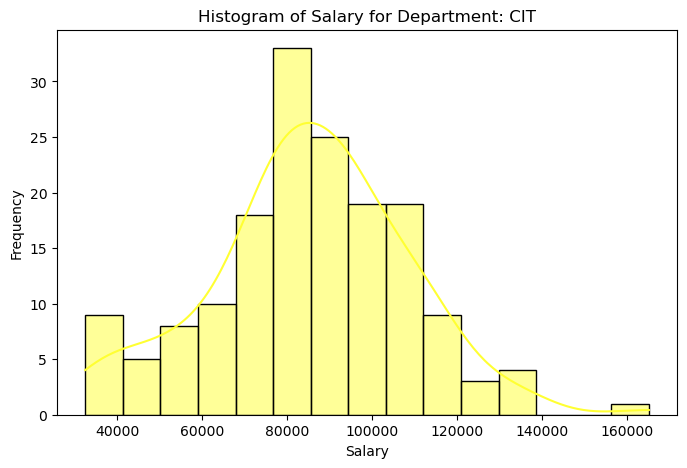

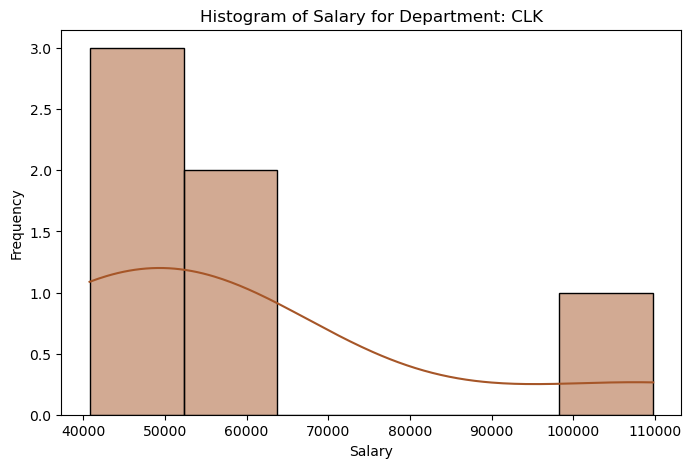

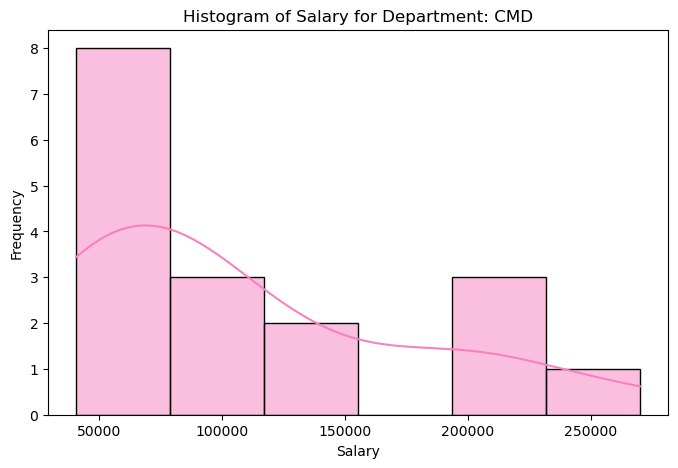

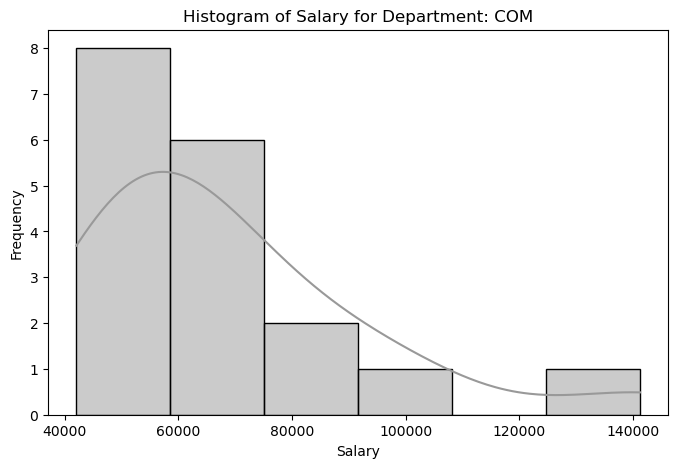

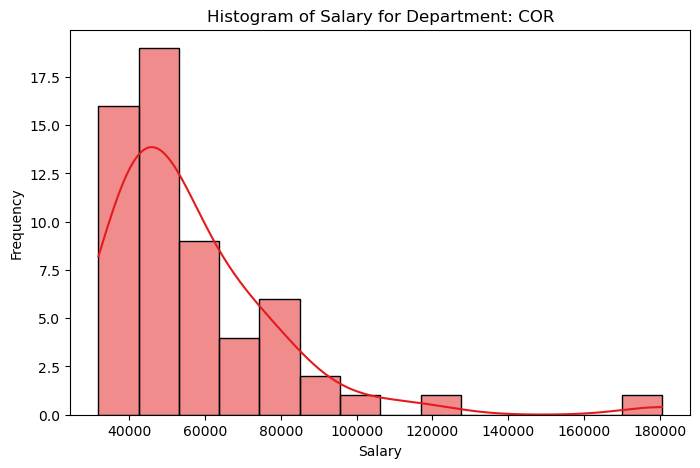

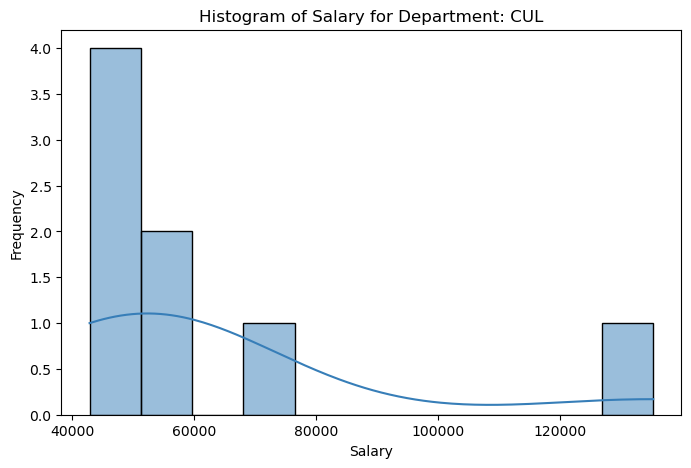

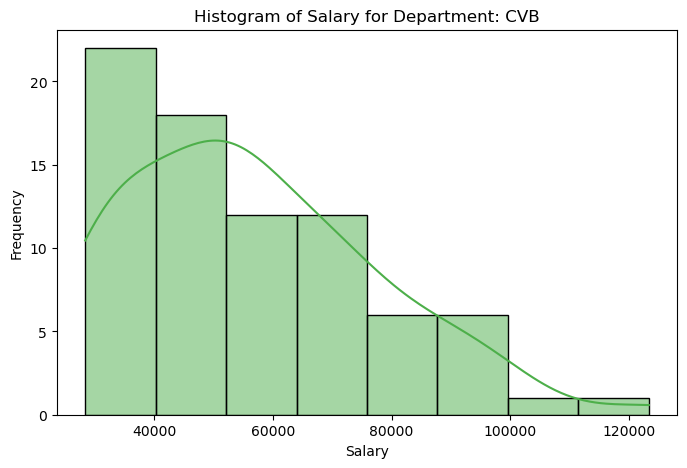

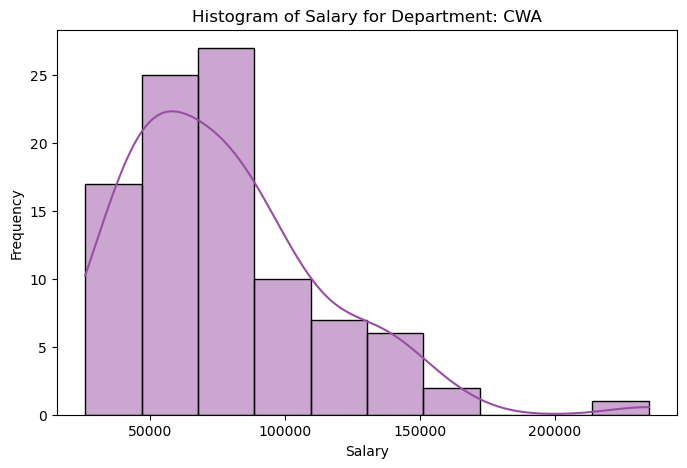

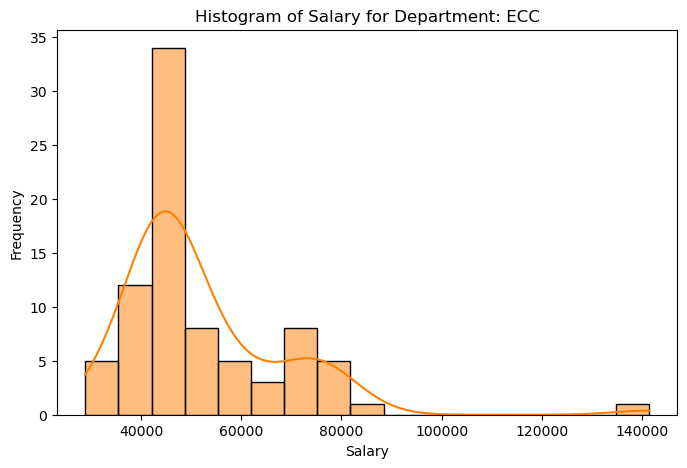

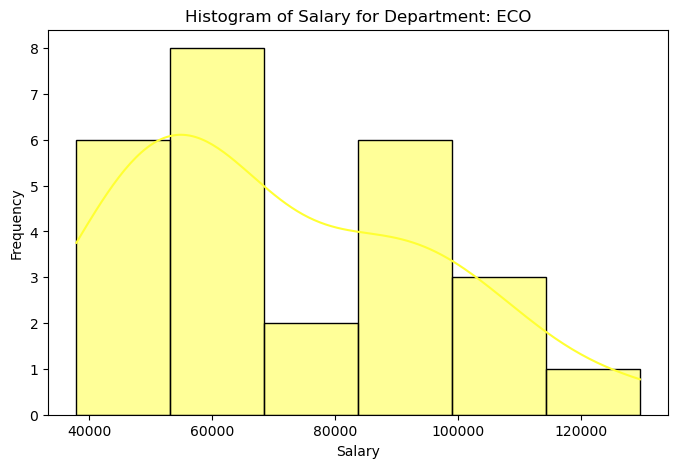

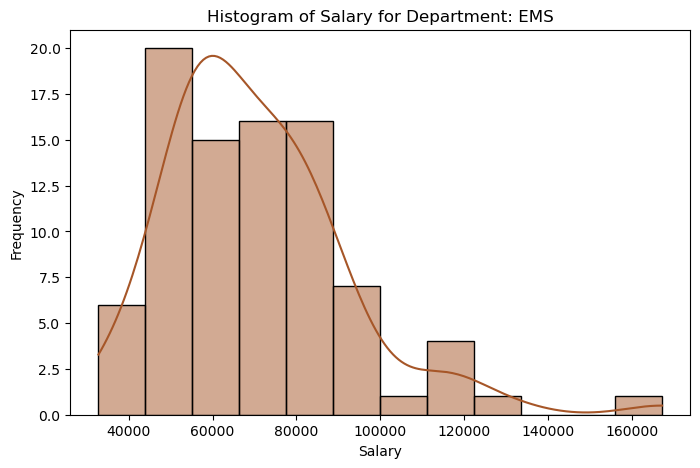

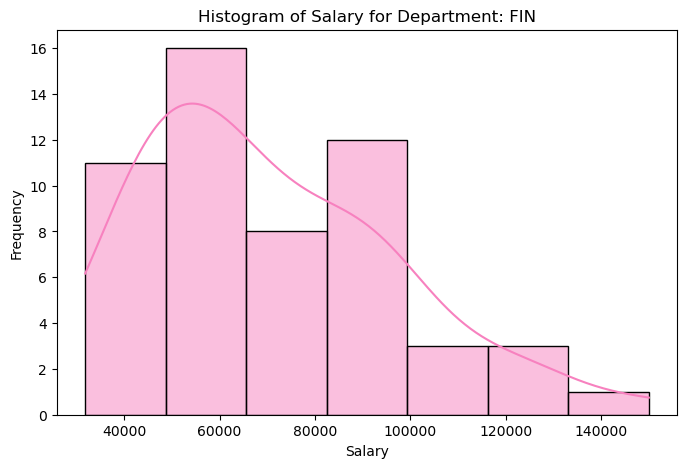

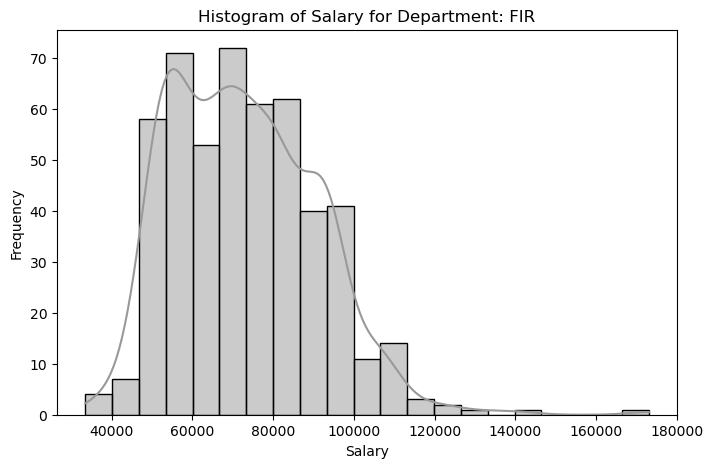

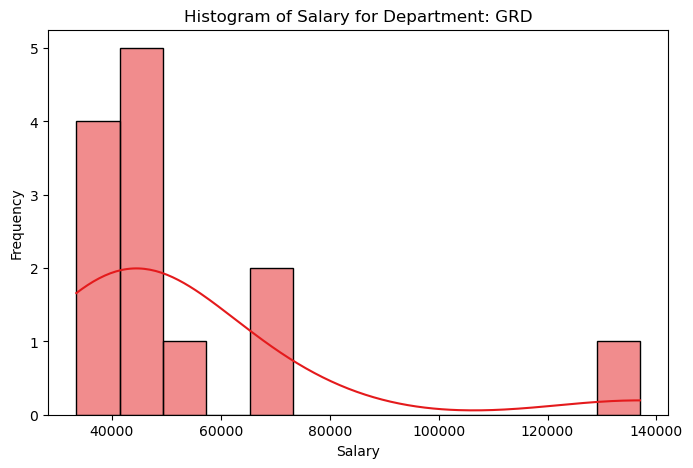

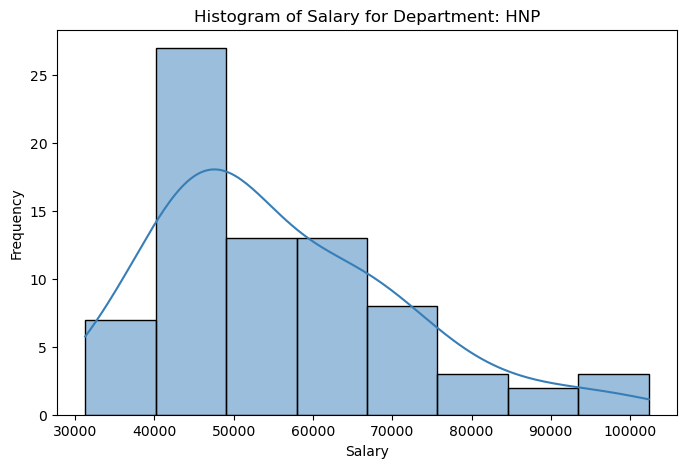

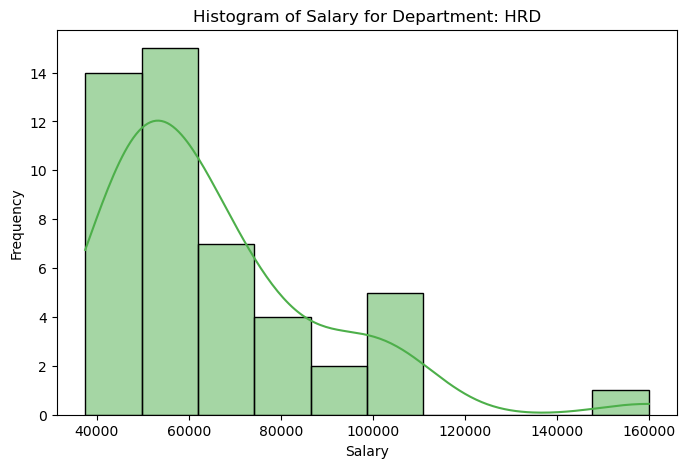

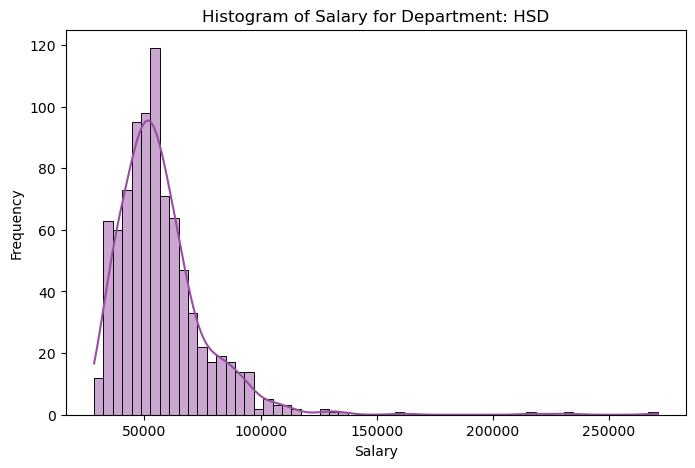

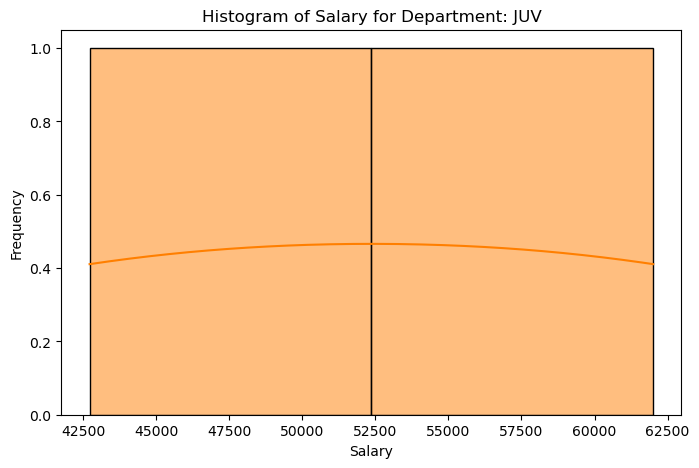

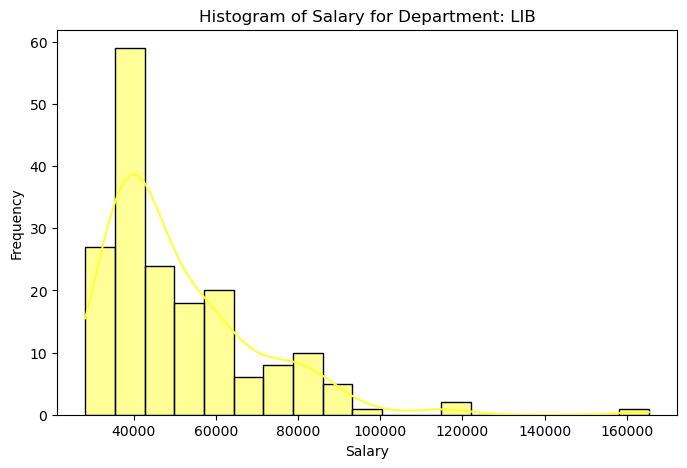

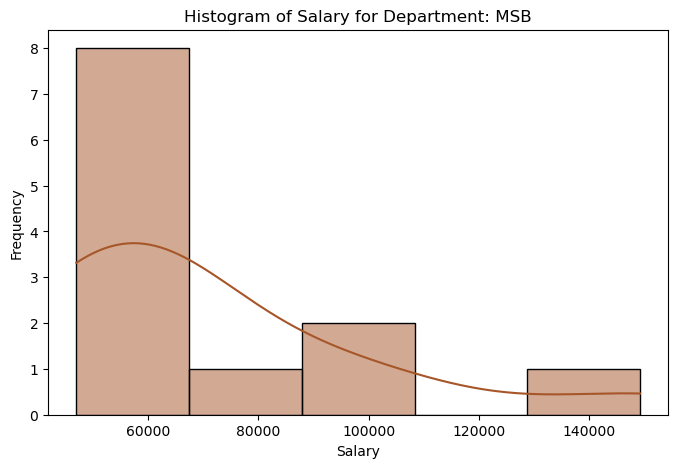

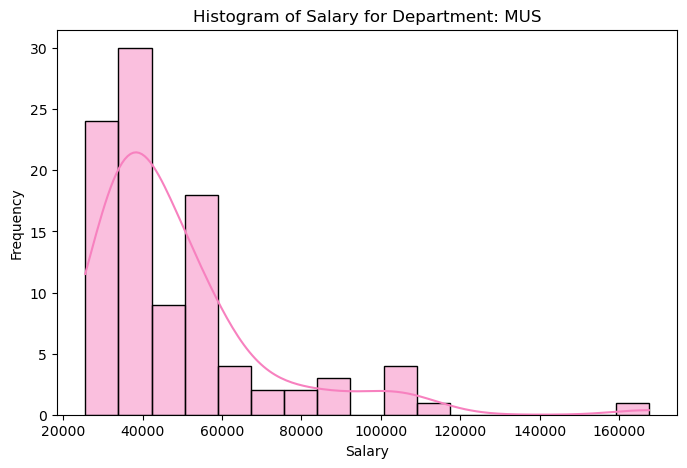

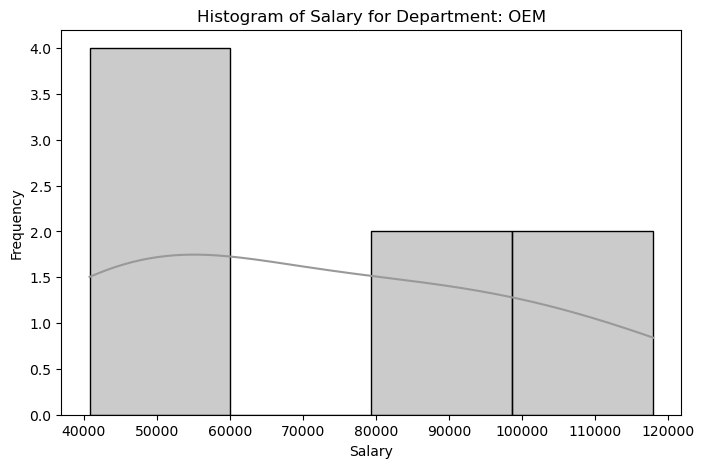

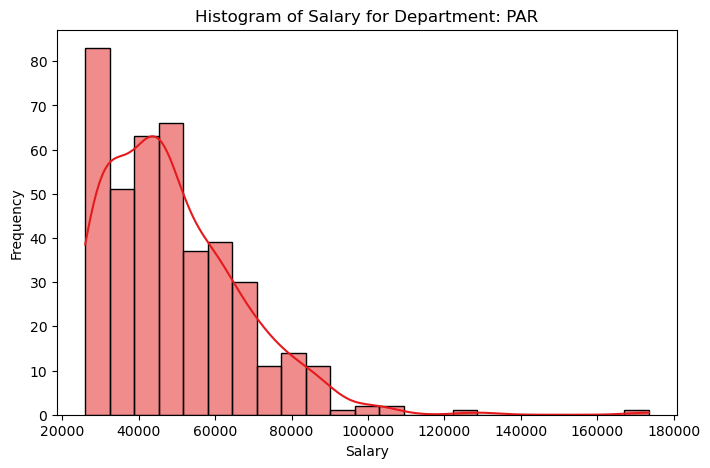

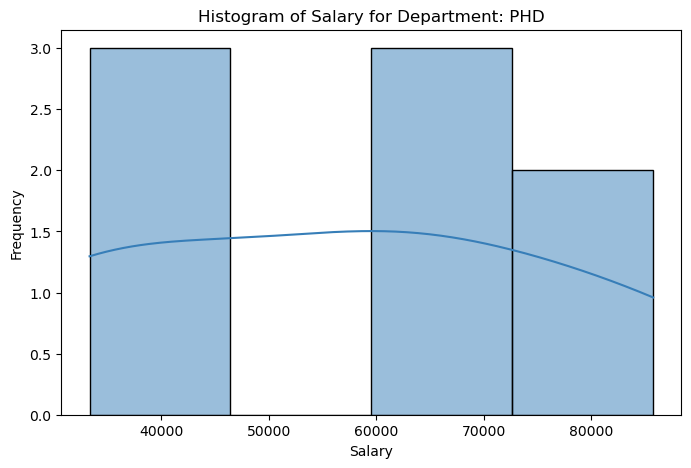

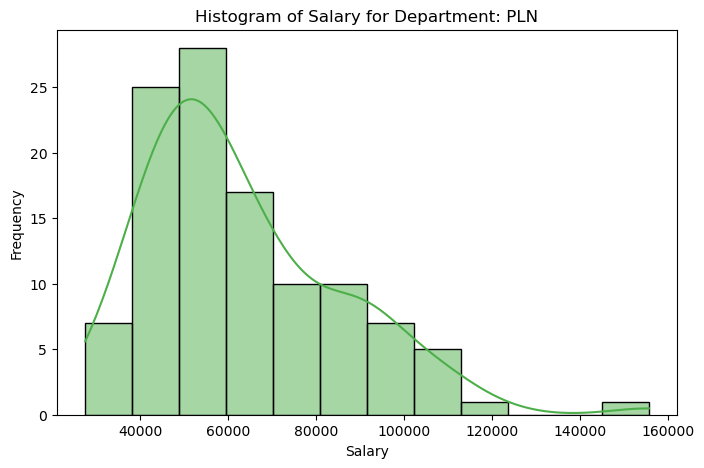

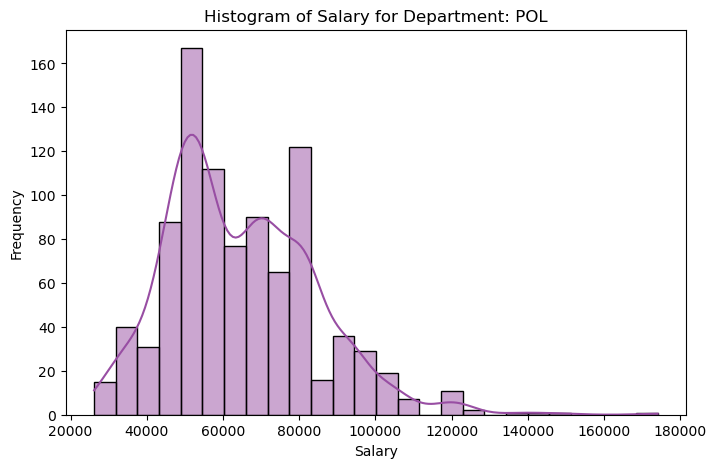

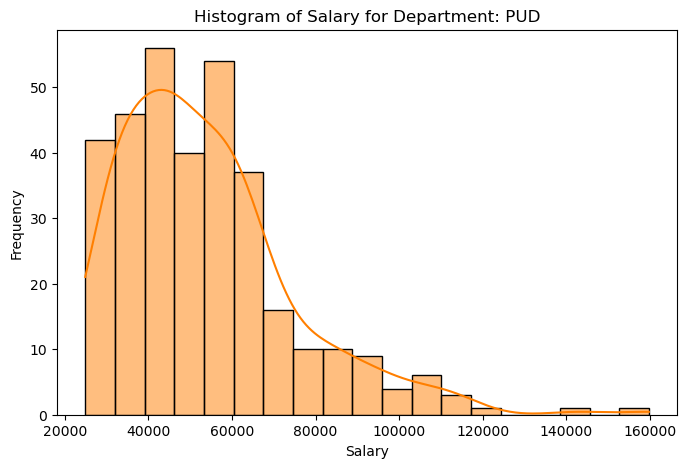

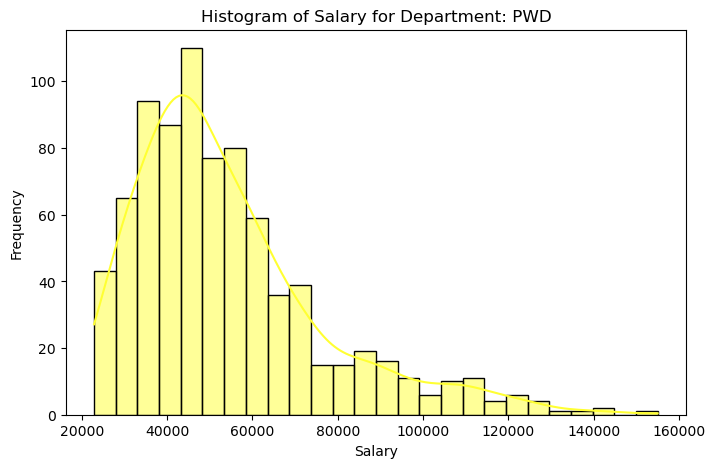

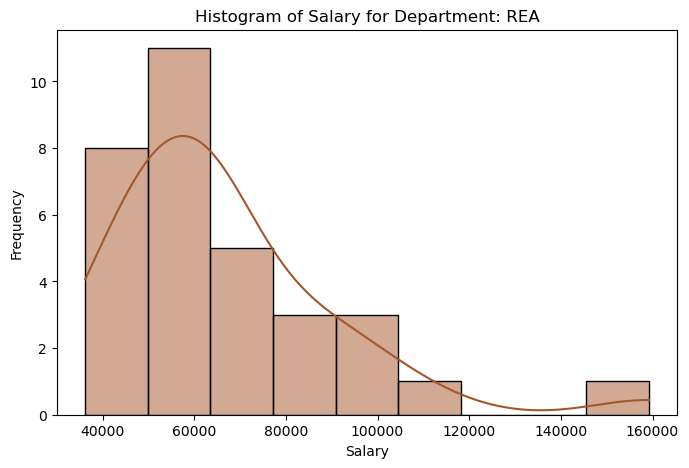

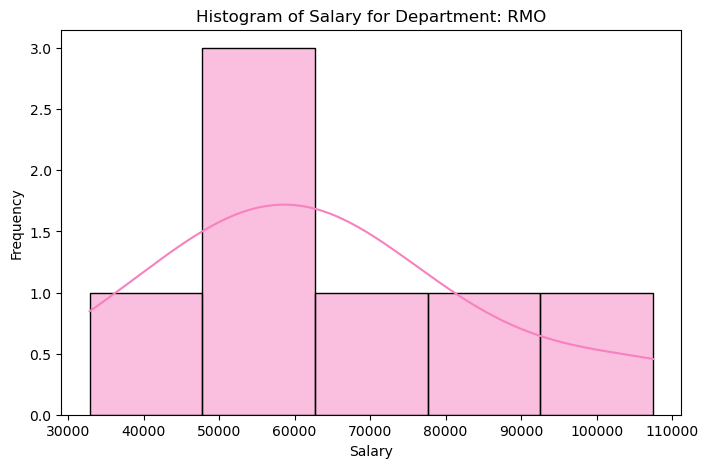

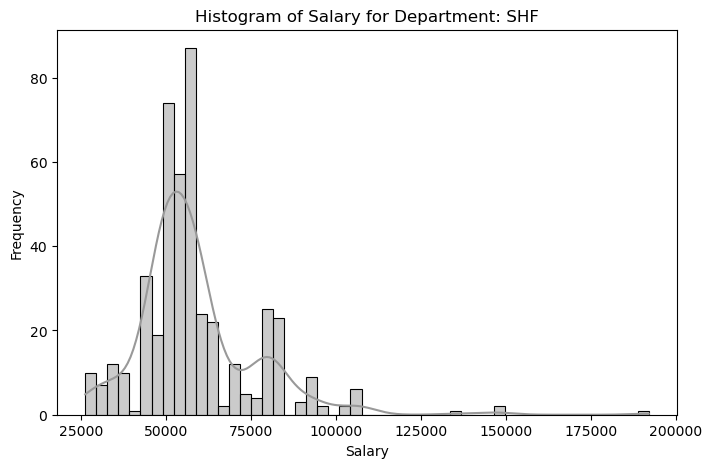

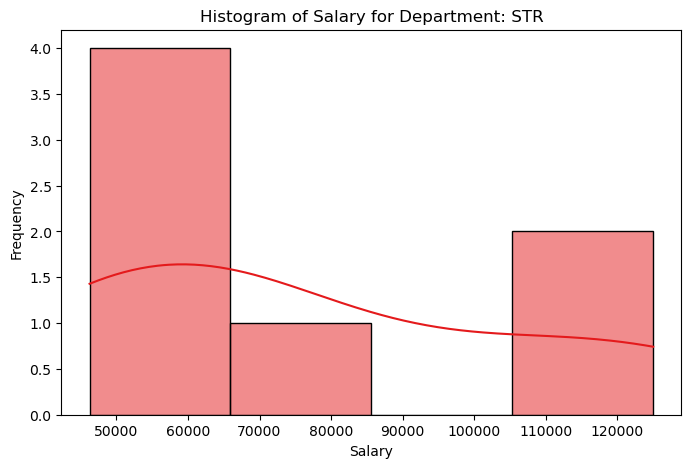

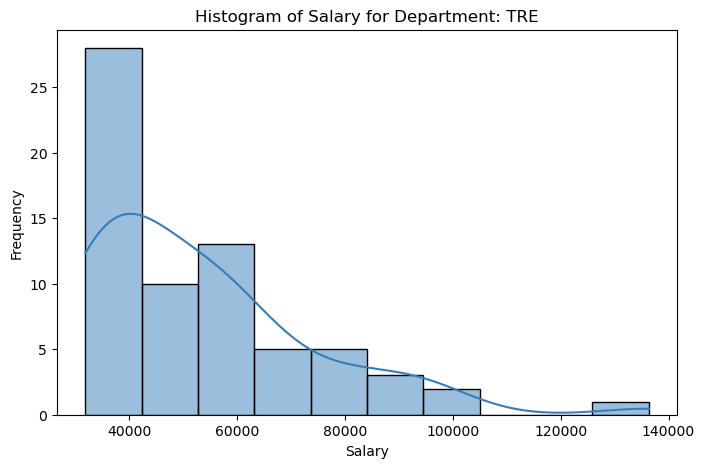

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Employee_Salaries.csv')
# Filter out rows where 'Salary' is <= 10000
df_salary_filtered = df[df['Salary'] > 10000]
df_salary_filtered['Department'].unique() ## checking departments

# # # Define the list of departments to analyze, in this case I'm inspecting all histograms for annual salaried workers
department_list_to_analyse = ['AGR', 'AUD', 'CAD', 'CCC', 'CIR', 'CIT', 'CLK', 'CMD', 'COM',
       'COR', 'CUL', 'CVB', 'CWA', 'ECC', 'ECO', 'EMS', 'FIN', 'FIR',
       'GRD', 'HNP', 'HRD', 'HSD', 'JUV', 'LIB', 'MSB', 'MUS', 'OEM',
       'PAR', 'PHD', 'PLN', 'POL', 'PUD', 'PWD', 'REA', 'RMO', 'SHF',
       'STR', 'TRE']

# Filter the DataFrame to include only the departments in department_list_to_analyse
df_salary_filtered_dept_slice = df_salary_filtered[df_salary_filtered['Department'].isin(department_list_to_analyse)]

# Define a color palette with unique colors for each department
color_palette = sns.color_palette("Set1", n_colors=len(department_list_to_analyse))

# Loop through each department in department_list_to_analyse and plot a histogram
for i, department in enumerate(department_list_to_analyse):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_salary_filtered_dept_slice[df_salary_filtered_dept_slice['Department'] == department], 
                 x='Salary', kde=True, bins='auto', color=color_palette[i], legend=True)
    plt.title(f"Histogram of Salary for Department: {department}")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
#     plt.savefig(f"data/exported/AnnualSalary_Histogram_{department}.png") # Saves each department as a separate .png file, commented out for presentation
    plt.show()

The following code below will save all histograms for annual salaried employees into a single .png file onto local drive, it has been commented out for presentation. Images can be found in github under "Histogram_All_Departments.png"

It accomplishes the same plots as above, just that it'll save all plots into a single file as specified by the directory & the file name below:
"data/exported/AnnualSalary_Histogram_All_Departments.png"

In [23]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.read_csv('data/Employee_Salaries.csv')
# # Filter out rows where 'Salary' is <= 10000
# df_salary_filtered = df[df['Salary'] > 10000]
# df_salary_filtered['Department'].unique() ## checking departments

# # # # Define the list of departments to analyze, in this case I'm inspecting all histograms for annual salaried workers
# department_list_to_analyse = ['AGR', 'AUD', 'CAD', 'CCC', 'CIR', 'CIT', 'CLK', 'CMD', 'COM',
#        'COR', 'CUL', 'CVB', 'CWA', 'ECC', 'ECO', 'EMS', 'FIN', 'FIR',
#        'GRD', 'HNP', 'HRD', 'HSD', 'JUV', 'LIB', 'MSB', 'MUS', 'OEM',
#        'PAR', 'PHD', 'PLN', 'POL', 'PUD', 'PWD', 'REA', 'RMO', 'SHF',
#        'STR', 'TRE']

# # Filter the DataFrame to include only the departments in department_list_to_analyse
# df_salary_filtered_dept_slice = df_salary_filtered[df_salary_filtered['Department'].isin(department_list_to_analyse)]

# # Define a color palette with unique colors for each department
# color_palette = sns.color_palette("Set1", n_colors=len(department_list_to_analyse))

# # Create a single figure with multiple subplots
# fig, axs = plt.subplots(nrows=len(department_list_to_analyse), figsize=(8, 5 * len(department_list_to_analyse)))

# # Loop through each department in department_list_to_analyse and plot a histogram
# for i, department in enumerate(department_list_to_analyse):
#     sns.histplot(data=df_salary_filtered_dept_slice[df_salary_filtered_dept_slice['Department'] == department], 
#                  x='Salary', kde=True, bins='auto', color=color_palette[i], legend=True, ax=axs[i])
#     axs[i].set_title(f"Histogram of Salary for Department: {department}")
#     axs[i].set_xlabel("Salary")
#     axs[i].set_ylabel("Frequency")

# # Adjust layout to avoid overlapping titles
# plt.tight_layout()

# # Save the entire figure with all subplots as a single .png file
# plt.savefig("data/exported/AnnualSalary_Histogram_All_Departments.png")
# plt.show()

As observed, with the exception of Departments AUD, OEM, PHD, RMO, most of the departments are mostly right-skewed as well. Hence emphasis will be placed on CV for evaulation

👏 Findings & Recommendations based on final SQL code output 👏
---
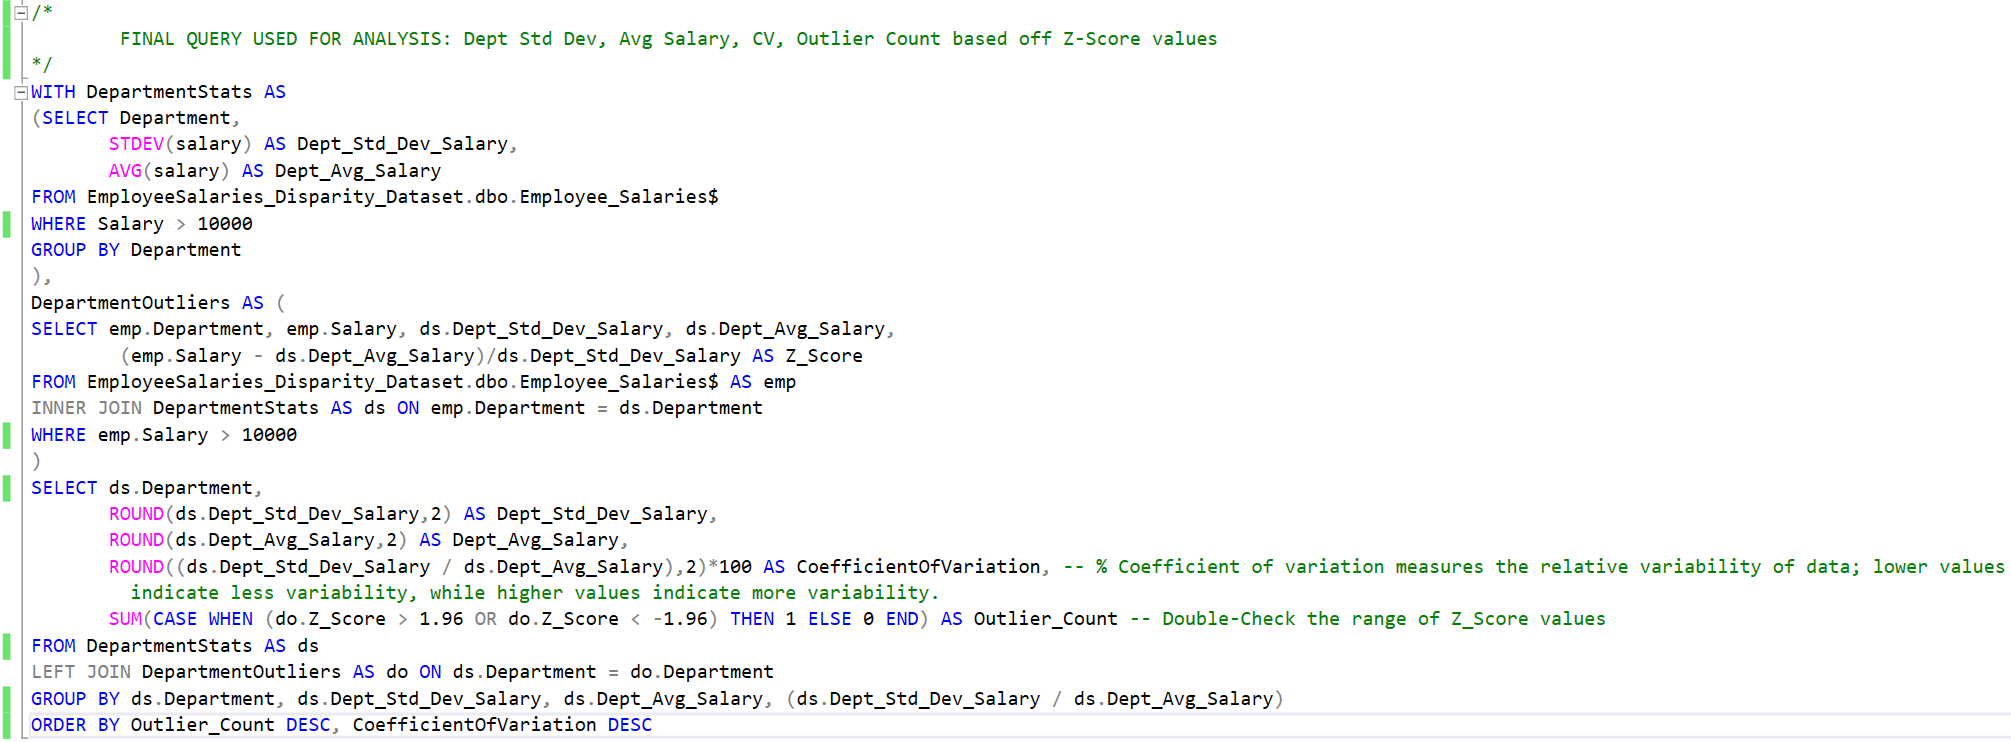

> **OVERALL GOAL:** 
> - Provide commentary on recommendations

Below are summary statistics of the SQL ouput:

In [24]:
df_Stats = pd.read_csv('data/EmployeeSalaries_stddev_Avg_CV_Outlier.csv')
df_Stats

Department  Dept_Std_Dev_Salary  Dept_Avg_Salary  CoefficientOfVariation  \
0         PWD             22379.82         54081.39                      41   
1         POL             19520.08         64627.41                      30   
2         HSD             20283.92         57033.48                      36   
3         PAR             18245.89         48997.58                      37   
4         PUD             21055.34         53733.42                      39   
5         SHF             17918.59         58587.35                      31   
6         CIT             23292.89         85091.31                      27   
7         FIR             18007.29         72818.45                      25   
8         MUS             22527.68         48815.84                      46   
9         LIB             19056.55         51307.80                      37   
10        EMS             21898.89         70420.29                      31   
11        PLN             22612.20         63219.85                      36   
12        CWA             36869.17         77204.04                      48   
13        TRE             20981.09         53106.69                      40   
14        FIN             26706.54         70598.81                      38   
15        CVB             20951.06         56411.43                      37   
16        HNP             15670.68         55625.91                      28   
17        CCC             25641.94         47720.64                      54   
18        COR             24278.21         56679.49                      43   
19        ECC             16469.23         52211.51                      32   
20        CMD             68918.53        107711.81                      64   
21        AGR             34426.74         63457.62                      54   
22        GRD             27133.11         53777.70                      50   
23        CUL             30134.15         63193.65                      48   
24        CAD             45415.42         93902.41                      48   
25        CLK             25562.12         59403.76                      43   
26        CIR             27153.87         64061.38                      42   
27        MSB             30136.39         71015.97                      42   
28        HRD             23888.98         65145.10                      37   
29        REA             24702.58         66437.16                      37   
30        COM             24824.62         68566.75                      36   
31        ECO             24584.25         70854.24                      35   
32        AUD             35562.14         88504.13                      40   
33        STR             31000.12         76835.76                      40   
34        OEM             28519.86         72316.82                      39   
35        PHD             20939.37         56395.66                      37   
36        RMO             23440.30         64189.17                      37   
37        JUV             13637.09         52366.34                      26   

    Outlier_Count  
0              47  
1              37  
2              24  
3              18  
4              17  
5              14  
6              11  
7               9  
8               6  
9               6  
10              6  
11              5  
12              3  
13              3  
14              3  
15              3  
16              3  
17              2  
18              2  
19              2  
20              1  
21              1  
22              1  
23              1  
24              1  
25              1  
26              1  
27              1  
28              1  
29              1  
30              1  
31              1  
32              0  
33              0  
34              0  
35              0  
36              0  
37              0

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the DataFrame
print(df_Stats.info())

# Check for missing values
print(df_Stats.isnull().sum())

# Summarize numerical columns
print(df_Stats.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Department              38 non-null     object 
 1   Dept_Std_Dev_Salary     38 non-null     float64
 2   Dept_Avg_Salary         38 non-null     float64
 3   CoefficientOfVariation  38 non-null     int64  
 4   Outlier_Count           38 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB
None
Department                0
Dept_Std_Dev_Salary       0
Dept_Avg_Salary           0
CoefficientOfVariation    0
Outlier_Count             0
dtype: int64
       Dept_Std_Dev_Salary  Dept_Avg_Salary  CoefficientOfVariation  \
count            38.000000        38.000000               38.000000   
mean          25640.702632     64642.845263               39.236842   
std            9595.548731     13205.898196                8.224664   
min           13637.090

<span style="font-size: 15px;">Based on the SQL code output, below are the Histogram of selected departments selected for salary disparity review</span>
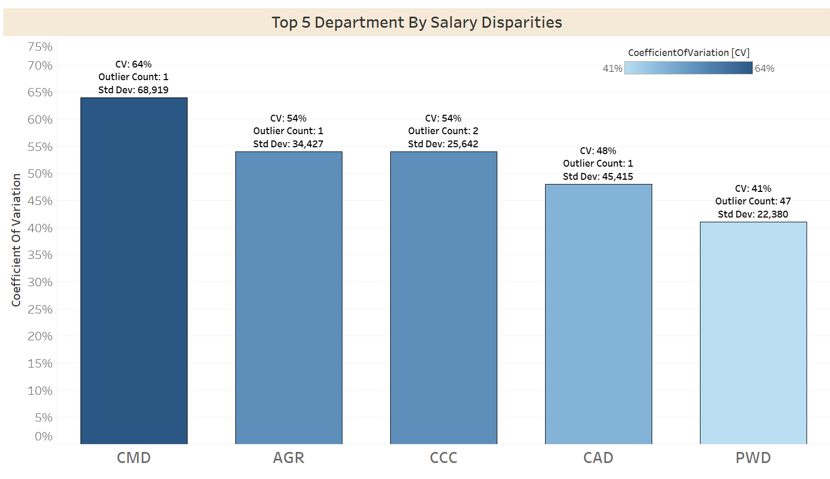

EDA on the selected departments for review

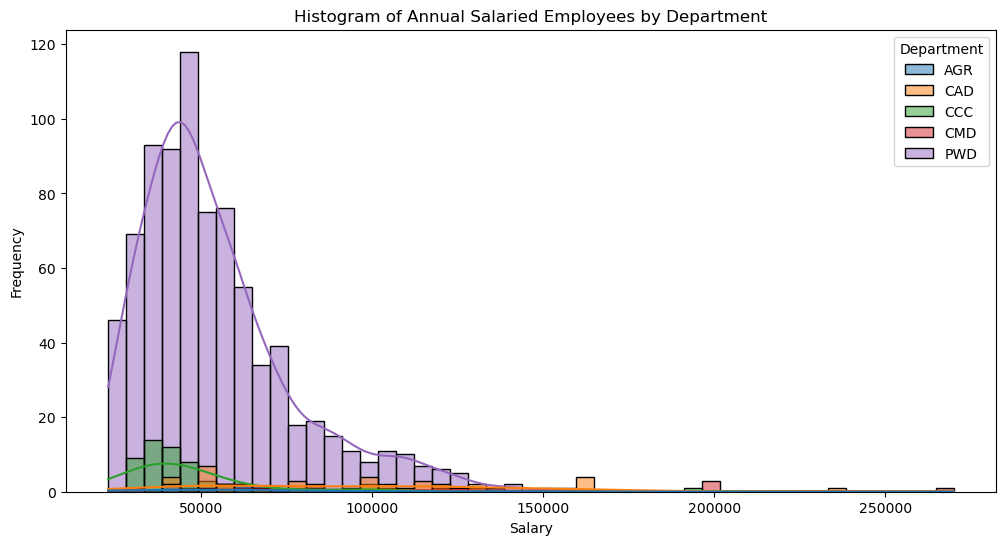

In [26]:
# Filter out rows where 'Salary' is > 10000
df_salary_filtered = df[df['Salary'] > 10000]

department_list_to_analyse = ['CMD','AGR','CCC','PWD','CAD']
df_salary_filtered_dept_slice = df_salary_filtered[df_salary_filtered['Department'].isin(department_list_to_analyse)]
df_salary_filtered_dept_slice['Department'].unique() ## checking if slice is correct

## Visualization: Histogram for each department
plt.figure(figsize=(12, 6))
sns.histplot(data=df_salary_filtered_dept_slice, x='Salary', kde=True, 
             hue='Department',
             bins='auto')
plt.title("Histogram of Annual Salaried Employees by Department")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

Hard to visualize histogram, especially with PWD department having higher salary than other departments in the list. Let's replot it below in a separate plot.

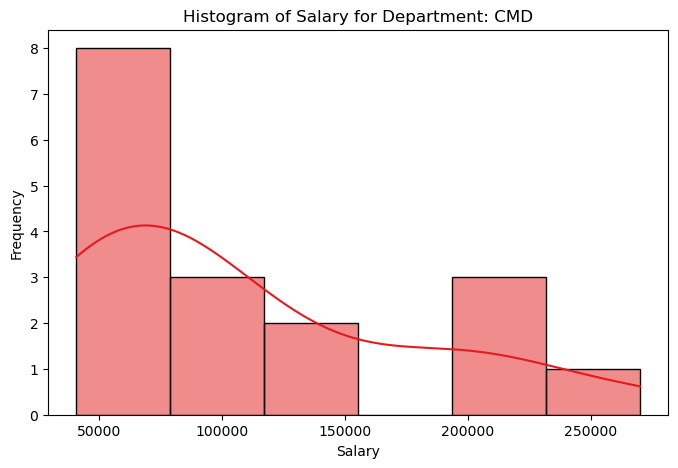

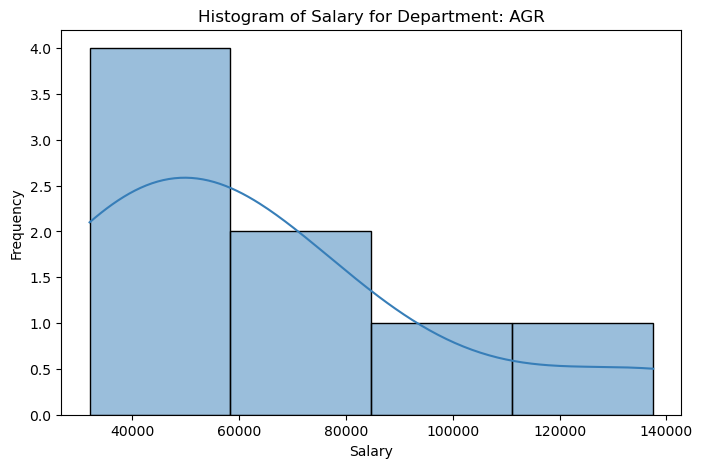

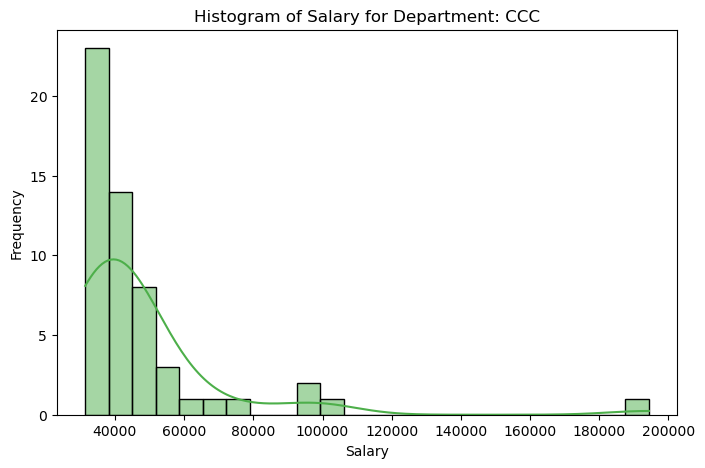

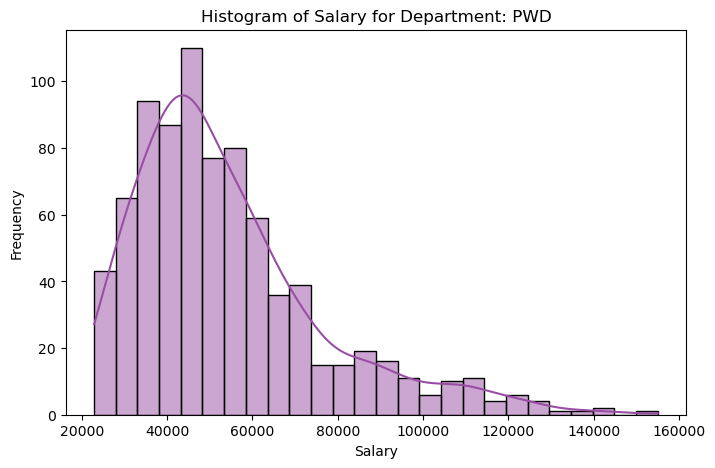

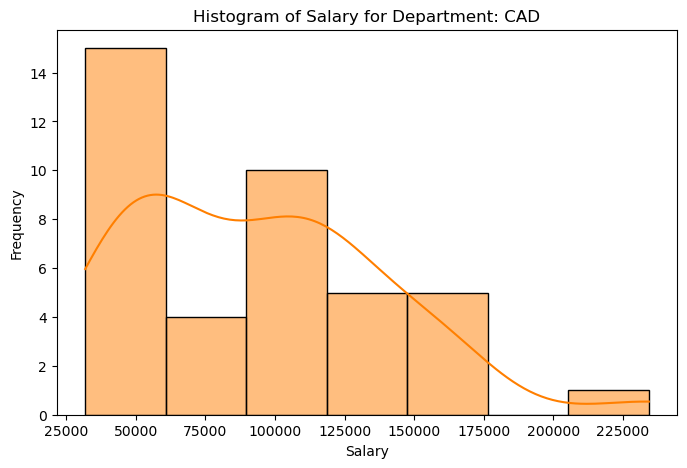

In [27]:
## plotting salary distribution within departmental level, we also see that they are mostly right-skewed as well for the departments chosen
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only salaries greater than or equal to 10000
df_salary_filtered = df[df['Salary'] > 10000]

# Define the list of departments to analyze
department_list_to_analyse = ['CMD', 'AGR', 'CCC', 'PWD', 'CAD']

# Filter the DataFrame to include only the departments in department_list_to_analyse
df_salary_filtered_dept_slice = df_salary_filtered[df_salary_filtered['Department'].isin(department_list_to_analyse)]

# Define a color palette with unique colors for each department
color_palette = sns.color_palette("Set1", n_colors=len(department_list_to_analyse))

# Loop through each department in department_list_to_analyse and plot a histogram
for i, department in enumerate(department_list_to_analyse):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_salary_filtered_dept_slice[df_salary_filtered_dept_slice['Department'] == department], 
                 x='Salary', kde=True, bins='auto', color=color_palette[i], legend=True)
    plt.title(f"Histogram of Salary for Department: {department}")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.show()

Here, we observe that the histograms selected for salary disparity review are right skewed & does not follow a normal distribution [where Z-Test is normally assumed], hence more emphasis is placed on the CV value & standard deviation during salary disparity evaluation for departmental salary variance & discrepancy

# Findings & Recommendations of departments to look into are below:

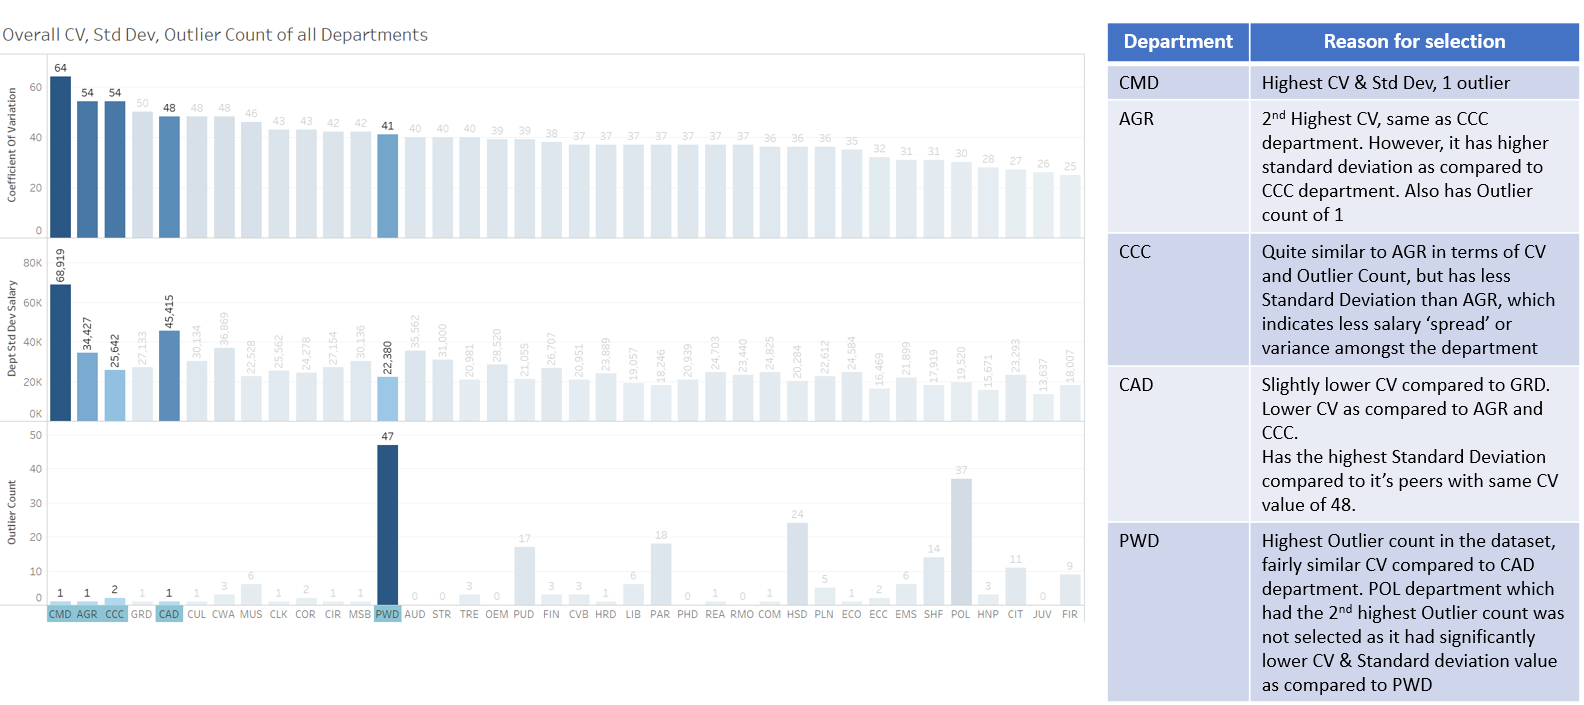
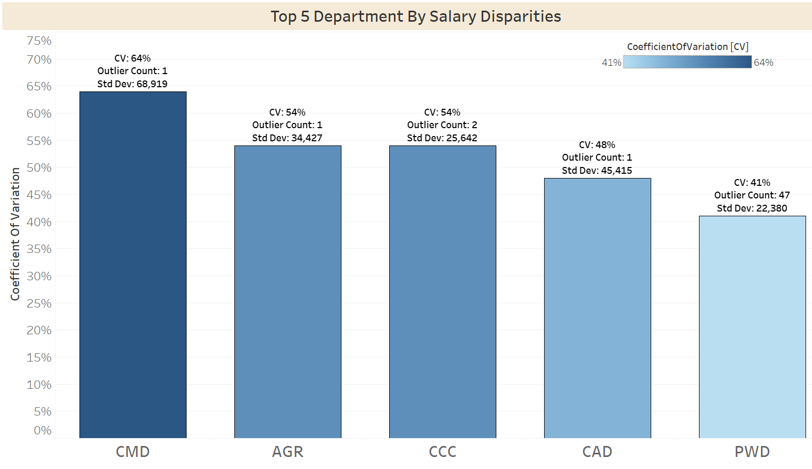

Conclusion:
PWD Department being flagged as having a high amount of salary spread is validated as it had the highest outlier count and has a moderately high CV value. However, Management should also look into the other departments listed in the plot above for salary discrepancy review

# 🥼🧪 Testing alternate Method, Determining Outliers via IQR, not included in Powerpoint as request is focused on departmental salary variance & discrepancy

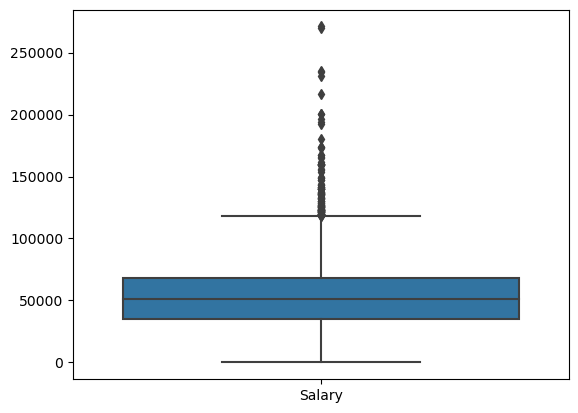

In [28]:
# Box plot of overall dataset
sns.boxplot(data=df)

# Show the plot
plt.show()

Code Block used to plot the department with DESC count of outliers for each department based on the IQR_SCALE_VALUE modifier

Count of outliers by departments in descending order via IQR-method:
 Department
HSD    101
SHF     91
POL     85
PWD     49
MUS     16
PUD     13
COR     10
FIR      9
PAR      7
CCC      5
CIT      5
ECC      3
GRD      3
CWA      3
CIR      3
REA      3
PLN      2
TRE      2
LIB      1
RMO      1
MSB      1
MCC      1
AGR      1
HRD      1
FIN      1
CUL      1
COM      1
CMD      1
CLK      1
CAD      1
HNP      1
JUV      0
AUD      0
OEM      0
EMS      0
PHD      0
ECO      0
CVB      0
STR      0
Name: Salary, dtype: int64


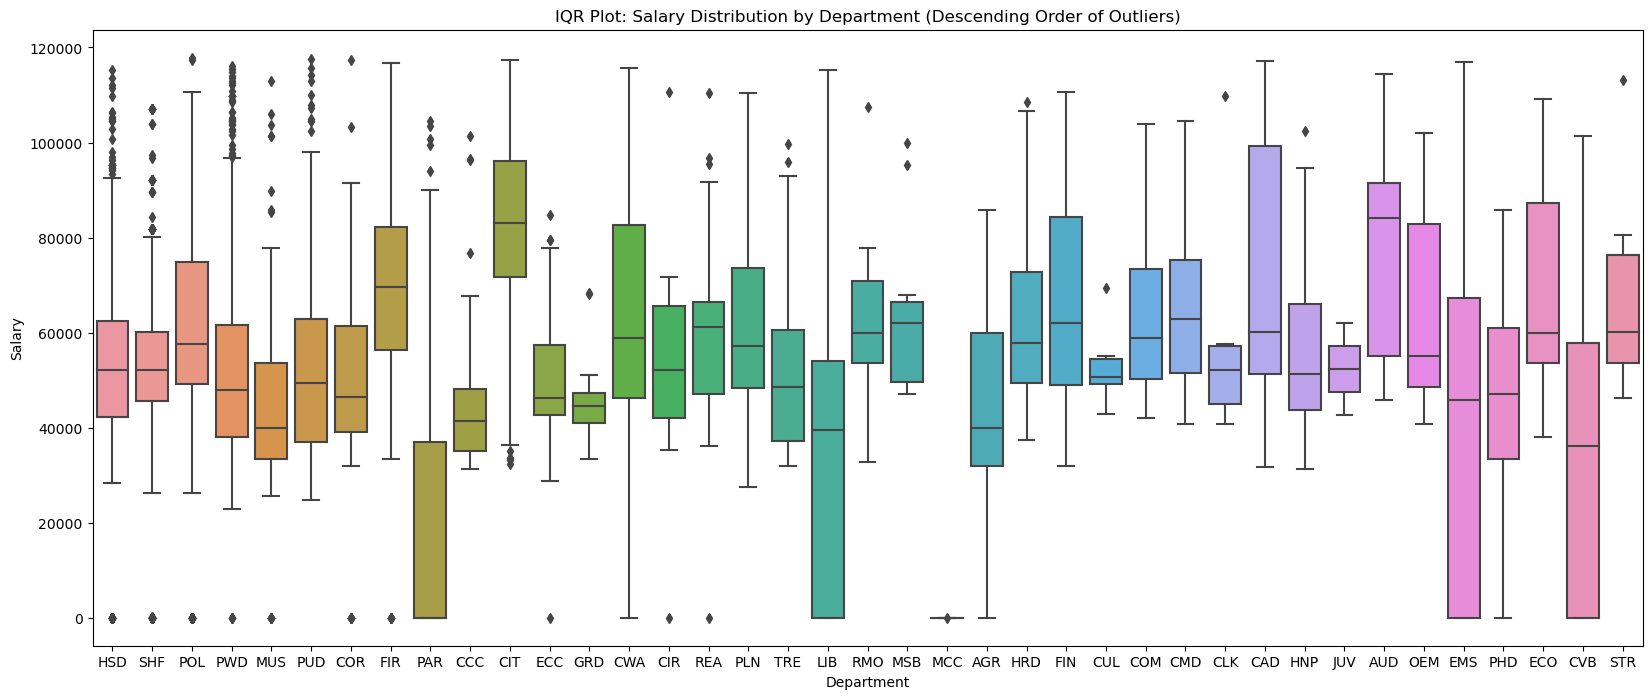

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## iqr_scale_value set to 1.5. Assuming a normally distributed dataset having a Gaussian Distribution, having an iqr_scale_value of 1.5 would theoretically capture outliers that fall outside the +/- 3 Std. Dev from the mean. This is commonly used in outlier detection with a typical Gaussian Distribution, which would typically represent the 0.15% of outlying data outside of a +/- 3 Std. Dev of a normally distributed graph.
## Further tuning of the optimal iqr_scale_value to accurately decpict outlier detection can be explores, given this dataset is not normally distributed
IQR_SCALE_VALUE = 1.5 ## parameter that controls the sensitivity of outlier detection, a higher value will result in fewer outliers being counted from both upper_bound & lower_bound parameters

# Calculate the number of outliers for each department
def count_outliers(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - IQR_SCALE_VALUE * iqr ## Define lower threshold limit as lower_bound, graphically this will affect the lower whisker length of the boxplot
    upper_bound = q3 + IQR_SCALE_VALUE * iqr ## Define upper threshold limit as upper_bound, graphically this will affect the upper whisker length of the boxplot
    return s[(s < lower_bound) | (s > upper_bound)].count() ## any point that falls outside the lower_bound and upper_bound will be treated as an 'outlier' point and be counted

outliers_count_by_department = df.groupby('Department')['Salary'].apply(count_outliers)
print(f"Count of outliers by departments in descending order via IQR-method:\n {outliers_count_by_department.sort_values(ascending=False)}") ## printout of departments by DESC order based on the count of outliers beyond the upper threshold and 

# Sort the departments based on the count of outliers in descending order
sorted_departments = outliers_count_by_department.sort_values(ascending=False).index

#### Filter out the outliers based on iqr_scale_value ####
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df['Salary'] < (Q1 - IQR_SCALE_VALUE * IQR)) | (df['Salary'] > (Q3 + IQR_SCALE_VALUE * IQR)))]

# Create the box plot segmented by 'Department' in the sorted order using the filtered data
plt.figure(figsize=(20, 8))
sns.boxplot(x='Department', y='Salary', data=df_filtered, order=sorted_departments)
plt.title("IQR Plot: Salary Distribution by Department (Descending Order of Outliers)")
plt.xlabel("Department")
plt.ylabel("Salary")

# ### ORIGINAL BOX PLOT without taking into account of iqr_scale_value ####
# plt.figure(figsize=(20, 8))
# sns.boxplot(x='Department', y='Salary', data=df, order=sorted_departments)
# ## Add a title and labels
# plt.title("IQR Plot: Salary Distribution by Department (Descending Order of Outliers)")
# plt.xlabel("Department")
# plt.ylabel("Salary")

### Rotate the x-axis labels for better visibility
### plt.xticks(rotation=45, ha='right')

#### Show the plot
plt.show()

In [30]:
## Not included in Powerpoint
# import seaborn as sns
# import matplotlib.pyplot as plt

# df_Stats = pd.read_csv('data/EmployeeSalaries_stddev_Avg_CV_Outlier.csv')
# df_Stats

# sns.set_theme(style="whitegrid")

# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(15, 15))

# # Sort departments by Coefficient of Variation in descending order
# df_outlier_sort = df_Stats.sort_values(by='Outlier_Count', ascending=False)

# # Define a color palette for the continuous color scale based on 'CoefficientOfVariation'
# pal = sns.color_palette("coolwarm", n_colors=len(df_Stats))

# # Plot the barplot with continuous color scale based on 'CoefficientOfVariation'
# sns.barplot(x="Department", y='Outlier_Count', data=df_outlier_sort,
#             label="Total", color="lightblue", saturation=0.8)

# ax = sns.barplot(x="Department", y='Outlier_Count',
#                  data=df_outlier_sort,
#                  hue='CoefficientOfVariation',  # Use 'CoefficientOfVariation' for the continuous color scale
#                  palette=pal,  # Set the color palette
#                  dodge=False)

# # Remove the legend
# ax.legend_.remove()

# # Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(ylabel="Stats", xlabel="Department")
# sns.despine(left=True, bottom=True)

# plt.title('Statistics Summary by Department', fontsize=16)

# plt.show()